---
# **Capstone Module 3 (Machine Learning)**
# **Dataset = E-Commerce Churn**
### **By_Sultan Patiprabu Alam**
---

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# statistics
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

#Missing Value Visualisation
import missingno as msno

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

# pipeline
from imblearn.pipeline import Pipeline

# imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Metric
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score, fbeta_score, make_scorer

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Cross Validation and SKFold
from sklearn.model_selection import StratifiedKFold,cross_val_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# pipeline
from imblearn.pipeline import Pipeline

# Save Model
import pickle

# **1. Introduction :Bussiness Understanding**
---

## **1.1 Background Context**

Perkembangan teknologi saat ini memberikan manfaat dan kemudahan dalam berbagai aktivitas sehari-hari. Aktivitas bisnis melalui media internet merupakan salah satu pemanfaatan teknologi. Internet merupakan sarana elektronik yang dapat dipergunakan untuk berbagai aktivitas seperti komunikasi, riset, dan transaksi bisnis. Sekarang sudah banyak orang yang memanfaatkan internet sebagai media pemasaran dan bisnis. Hal ini tidak aneh mengingat jumlah pengguna internet yang terus bertumbuh pesat dapat menjadi sebuah pasar yang potensial untuk dimasuki para pebisnis. Di lain pihak, praktik e-commerce dan e-bisnis ternyata mempunyai banyak keuntungan baik bagi perusahaan ataupun konsumen. Tren belanja online mulai diminati karena proses keputusan belanja online tidak serumit keputusan pembelian offline. Belanja online memang memudahkan dan menghemat waktu, menghemat biaya dibandingkan belanja tradisional. Proses keputusan belanja online adalah pencarian informasi, membandingkan alternatif yang ada, dan pengambilan keputusan. Pada tahap pencarian informasi, konsumen akan mencari referensi secara online dari manapun (seperti search engine atau Toko Online). Informasi yang dicari adalah berupa opini dari orang lain yang sudah mendapatkan manfaat dari produk yang dibeli ataupun untuk mendapat referensi toko online yang lebih baik.

Begitu ketat persaingan bisnis pada e-commerce membuat pelaku bisnis dari perusahaan 'xxx' melakukan berbagai upaya untuk mempertahankan customer salah satunya dengan berbagai campaign atau teknik marketing lainnya. Upaya yang dilakukan ini untuk menekan angka ***churn*** customer dari perusahaan. ***Churn*** merupakan suatu tindakan ketika customer berhenti melakukan transaksi atau pembelian pada perusahaan. Tingginya nilai ***churn rate*** merupakan hal yang harus dihindari, hal ini juga dapat mengindikasikan bahwa customer tidak puas terhadap pelayanan yang diberikan oleh perusahaan. Dari perusahaan sendiri tentu tidak ingin hal ini terjadi karena dibutuhkan biaya lebih besar untuk mencari customer yang baru dibandingkan biaya untuk mempertahankan customer. Berdasarkan [Philip E. Pfeifer](https://link.springer.com/article/10.1057/palgrave.jt.5740142) dalam jurnal yang berjudul *'The optimal ratio of acquisition
and retention costs'* disebutkan sudah menjadi teori umum bahwa dibutuhkan **5 kali biaya lebih banyak** dalam mendapatkan customer baru dibandingkan biaya dalam mempertahankan pelanggan yang sudah ada. Pada perusahaan 'xxx' ini ingin mengurangi jumlah customer yang ***churn*** dengan melakukan tindakan atau perlakuan yang tepat terhadap customer sesuai dengan *behavior* dari customer tersebut. Selanjutnya akan dilakukan pemodelan dengan menggunakan machine learning untuk memprediksi pelanggan yang akan ***churn*** atau tidak agar perusahaan dapat mengambil langkah yang tepat.

## **1.2 Problem Statement**

Pada suatu perusahaan tingginya pelanggan yang melakukan *Churn* merupakan suatu indikator tingkat kegagalan suatu perusahaan E-Commerce. Dimana apabila *Churn rate* sebesar 5% maka kita akan kehilangan 5% dari pelanggan tersebut. Tentu, Perusahaan sebisa mungkin harus menekan nilai *churn rate* ini sekecil mungkin. Sehingga diperlukan upaya untuk mengurangi persentase pelanggan yang melakukan *Churn*. Seperti disebutkan sebelumnya bahwa untuk mencari pelanggan lebih dibutuhkan biaya yang lebih besar dibandingkan mempertahankan pelanggan. Salah satu cara perusahaan e-commerce mempertahankan pelanggannya agar tidak melakukan Churn yaitu memberikan insentif retensi terhadap pelanggan. Insentif retensi terdiri dari berbagai macam seperti memberikan potongan harga, memberikan layanan yang menarik, memberikan prioritas pelayanan dan lain-lain. Namun, kebijakan pemberian insentif retensi belum dilakukan secara efektif. Kebijakan tersebut sering ditemui berbagai kendala bahkan membuat perusahaan semakin merugi karena pemberian insentif kepada pelanggan yang kurang tepat.

## **1.3 Goals**

Sehingga dari permasalahan yang ada, perusahaan ingin memiliki kemampuan untuk dilakukannya prediksi kemungkinan seorang pelanggan akan *Churn* atau tidak. Untuk memfokuskan upaya retensi, pemberian insentif meningkatkan pelayanan pada pelanggan yang terindikasi akan melakukan *Churn*. Selain itu juga agar perusahaan mengetahui faktor yang memengaruhi pelanggan bertahan agar strategi bisnis yang dilakukan tepat dengan keinginan pelanggan untuk menurunkan tingkat dari pelanggan yang *Churn*.


## **1.4 Confussion Matrix**

![](https://txt.cohere.ai/content/images/2022/06/feature.png)


Target utama dalam masalah ini adalah pelanggan yang berhenti berlangganan (Churn), seperti target yang sudah disebutkan pada context sebelumnya yaitu:

Target:
* 0 : Tidak Churn 
* 1 : Churn

False Positive yaitu pelanggan yang aktualnya tidak churn tetapi diprediksi churn.<br>
**Konsekuensi** : Tidak efektif dalam pemberian insentif. <br>
False negative yaitu pelanggan yang aktualnya churn tetapi diprediksi tidak akan churn. <br>
**Konsekuensi** : Kehilangan pelanggan.

Berdasarkan Metric Evaluation yang ada akan digunakan serta konsekuensi yang ada. Akan dibuat model yang akan mengurangi resiko kehilangan pelanggan karena untuk mendapatkan pelanggan baru membutuhkan biaya lebih banyak dibandingkan kita mempertahankan pelanggan yang ada. Sehingga kita akan fokus pada nilai FN dengan mendapatkan nilai recall yang tinggi dan tetap membandingkan nilai precision agar tidak terlalu jauh, Sehingga digunakan metric F2_score dengan data yang imbalance. Dilakukan juga Sampling Undersampling dan Oversampling. Selanjutnya akan dibandingkan model mana yang paling cocok untuk digunakan pada kasus ini.

# **2. Data Understanding**
---

## **2.1 Import Dataset**

In [2]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head(10)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
8,11.0,12.0,4,Mobile Phone,3,Married,2,0,4.0,137.02,0
9,17.0,7.0,3,Laptop & Accessory,1,Married,5,1,2.0,157.43,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Dari dataset yang dimiliki terdapat 3941 baris dan 11 kolom data yang akan digunakan

## **2.2 Data Dictionary**

Berikut ini merupakan *data dictionary* dari dataset yang dimiliki, *data dictionary* ini merupakan penjelasan dari beberapa kolom.

| **Feature** | **Description** |
| --- | --- |
| *Tenure* | Masa waktu penggunaan jasa e-commerce oleh customer |
| *WarehouseToHome* | Jarak dari gudang ke rumah customer |
| *NumberOfDeviceRegistered* | Jumlah total device terdaftar pada pelanggan tertentu |
| *PreferedOrderCat* | Kategori pesanan yang lebih disukai pelanggan dalam satu bulan terakhir  |
| *SatisfactionScore* | Skor kepuasan customer terhadap pelayanan |
| *MaritalStatus* |  Status pernikahan customer |
| *NumberOfAddress* |  Jumlah total alamat terdaftar pada pelanggan tertentu|
| *Complaint* | Keluhan yang diberikan berdasarkan satu bulan terakhir |
| *DaySinceLastOrder* | Jumlah hari dari pemesanan terakhir |
| *CashbackAmount* | Rata-rata Cashback berdasarkan satu bulan terakhir |
| *Churn* | Label churn | 

## **2.3 Data Summary**

### **2.3.1 Missing Value**

Selanjutnya kita akan melakukan identifikasi missing value yang terdapat dalam dataset.

In [4]:
df.isna().sum()

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Text(0.5, 1.0, 'Missing Value Matrix')

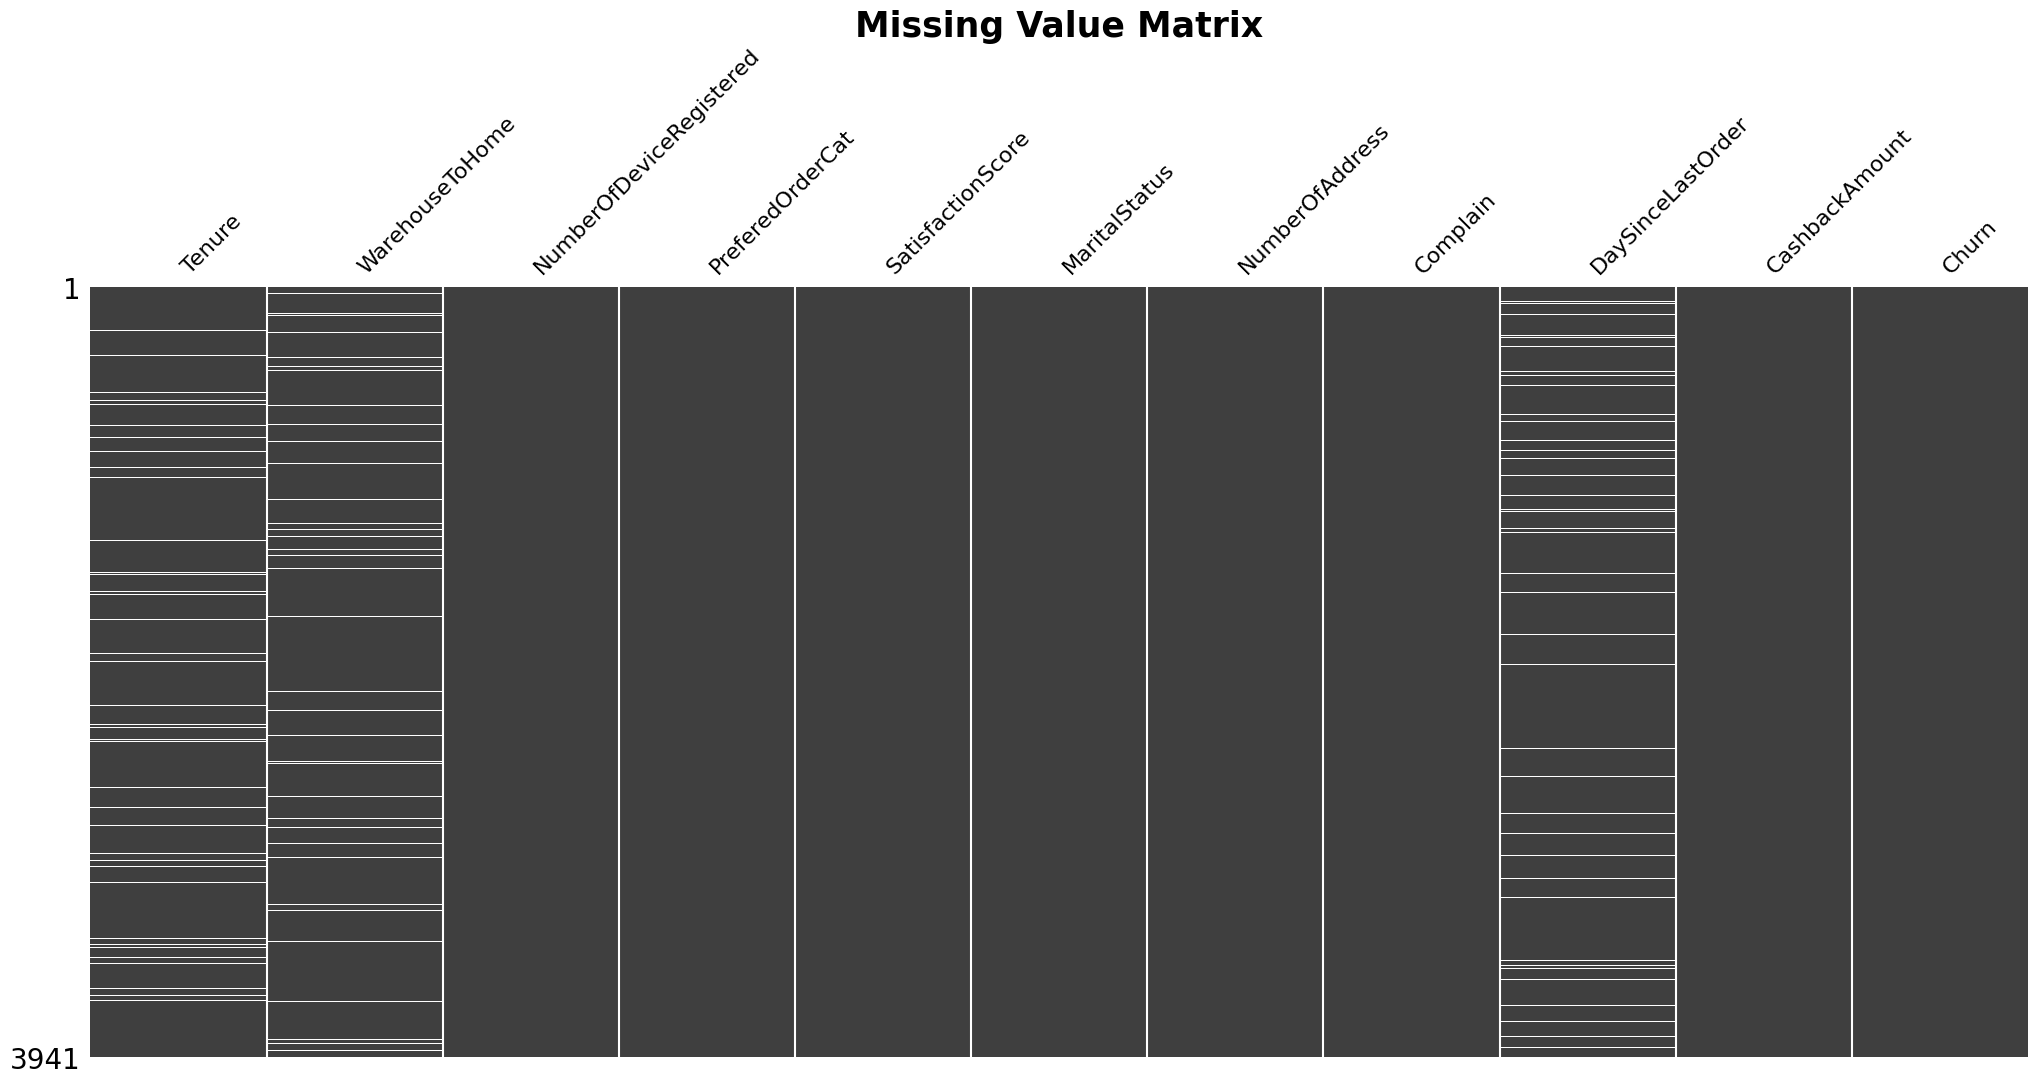

In [5]:
msno.matrix(df, sparkline=False)
plt.title('Missing Value Matrix', weight='bold', size=25)

Berdasarkan visualisasi dan tabel terkait missing value diatas dapat kita ketahui bahwa :
- Terdapat 3 kolom yang memiliki missing value
- kolom 'Tenure', 'WarehouseToHome', dan 'DaySinceLastOrder'. Dengan masing-masing jumlah missing value secara berurutan adalah 194,169, dan 213.
- Secara pola dapat diketahui bahwa missing value memiliki pola yang cukup abstrak dalam letaknya.
- Karena pola yang begitu abstrak, artinya tidak terdapat kondisi tertentu dan khusus yang dapat menyebabkan suatu baris data tidak memiliki nilai (missing value)
- Missing value ini akan diisi dengan menggunakan imputer, Untuk missing value pada kolom numerikal akan diisi dengan pilihan (rata-rata, median, atau constant). Nilai ganti dari missing value akan ditentukan setelah mengetahui apakah data terdistribusi normal atau tidak.

### **2.3.2 Duplicated Data & Decriptive Data Info**

In [6]:
df.duplicated().sum()

671

In [7]:
display(
    df.describe(),
    df.describe(include='object')
)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


- Dari informasi diatas terdapat 671 baris data yang merupakan duplikat, baris data ini akan dihilangkan.
- Terdapat 9 kolom numerikal dan 2 kolom kategorikal.
- Ada 2 kolom dengan value numerikal yang sebenarnya masuk sebagai kategorikal, tetapi nilai dari kolom tersebut berupa angka yang merupakan representasi dari kategori yang ada.

### **2.3.3 Unique Value & Outliers Data**

In [8]:
def tabel_summary (x):
    Type=[]
    Count=[]
    Sample=[]
    MissVal=[]
    for i in x.columns:
        Sample.append(x[i].unique()[:10])
        Count.append(x[i].nunique())
        Type.append(x[i].dtype)
        MissVal.append(x[i].isna().sum())
    unik=pd.DataFrame({
        'Columns':df.columns,
        'Dtype':Type,
        'Nunique':Count,
        'Missing Value':MissVal,
        'Unique':Sample
    })
    return unik

In [9]:
tabel_summary(df)

,Columns,Dtype,Nunique,Missing Value,Unique
0,Tenure,float64,36,194,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,33,169,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,6,0,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,6,0,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,5,0,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,3,0,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,14,0,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11]"
7,Complain,int64,2,0,"[0, 1]"
8,DaySinceLastOrder,float64,22,213,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,2335,0,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Tabel tersebut memberi tahu bahwa terdapat beberapak kolom dengan nilai atau value yang memiliki makna yang sama yaitu 'Mobile' dan 'Mobile Phone' pada kolom 'PreferedOrderCat', untuk tipe data juga dirasa sudah cukup sesuai dengan data dictionary.

In [10]:
df['Churn'].value_counts()/len(df['Churn']) * 100

Churn
0    82.897742
1    17.102258
Name: count, dtype: float64

- 'Churn' merupakan target pada modelling kali ini dimana, '0' berarti (tidak churn) sedangkan '1' berarti (churn). Dari proporsi angka churn dan tidak churn sangat timpang yaitu 82.9% untuk tidak churn dan 17.1% untuk churn yang berarti dalam pemodelan akan digunakan resampler.
---

Selanjutnya akan diidentifikasi untuk outlier data menggunakan boxplot dan histplot, identifikasi data dilakukan pada 3 kolom numerikal dengan unique value yang cukup banyak yaitu pada kolom 'Tenure','WarehouseToHome', dan 'CashbackAmount'

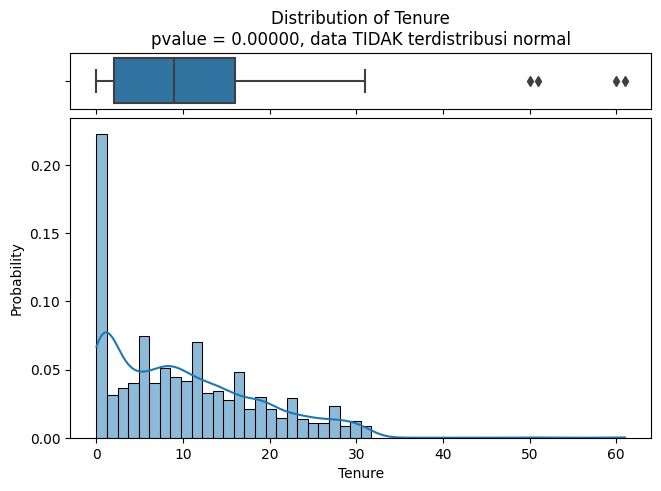

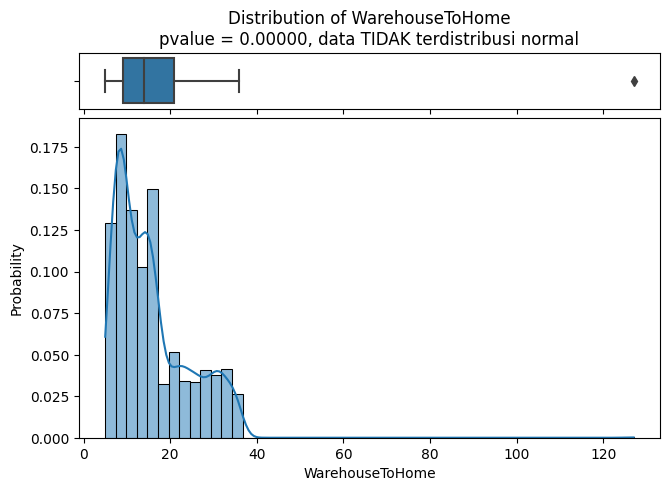

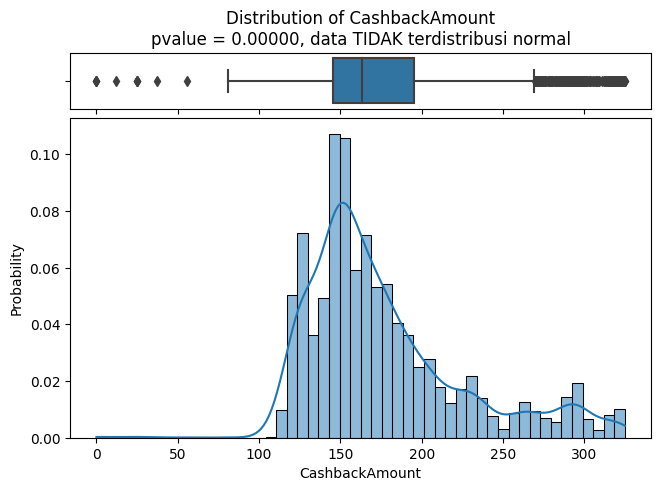

In [11]:
for kolom in df[['Tenure','WarehouseToHome','CashbackAmount']]:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

Dari visualisasi diatas ketiga kolom tidak memiliki data yang terdistribusi normal, pada kolom 'Tenure' dan 'WarehouToHome' memiliki jumlah outlier yang sangat sedikit yaitu kurang dari 5 baris data. Yang selanjutnya akan dieksplore lebih lanjut apakah baris data tersebut dapat dihilangkan? bagaimana proporsi 'Churn' pada data outlier? apakah masih sama dengan data keseluruhan?

# **3. Data Cleaning**
---

Sebelum melakukan cleaning data, dataframe mentah akan disimpan terlebih dahulu sebagai bentuk preventive dari hal yang tidak diinginkan. 

In [12]:
df_clean = df.copy()
df_clean.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


## **3.1 Define Problem in Raw Data**

Berikut merupakan beberapa permasalahan yang terdapat pada data mentah yang dimiliki:
- Missing value Terdapat missing value pada 3 kolom dengan pola yang cukup abstrak, yaitu pada kolom 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'
- Terdapat data duplikat sejumlah 671 data
- Ada value yang memiliki artian yang sama pada kolom 'PreferedOrderCat' yaitu 'Mobile' dan 'Mobile Phone'
- Melakukan eksplorasi terhadap outlier data dan mengatasi outlier data

## **3.2 Handling Missing Values**

Pada pemodelan ini untuk missing values tidak akan di drop ataupun mengganti nilai dengan mean/median/modus secara manual, tetapi nilai dari missing value akan diisi dengan menggunakan simple imputer untuk menghindari *adanya data leakage*, *data leakage* sendiri merupakan suatu keadaan dimana saat pembuat model secara tidak sengaja menyebarkan informasi antara train-set dengan test-set, Dalam split data sendiri memiliki tujuan untuk tidak terdapat data yang dibagikan antara train-set dan test-set, Karena fungsi dari test-set untuk melakukan simulasi data yang real yang asumsinya data tersebut tidak diketahui.

## **3.3 Drop Duplicated Data**

Pada informasi sebelumnya diketahui bahwa terdapat 671 data duplikat, data duplikat ini selanjutnya yang akan dihapus karena dirasa dapat mempengaruhi saat proses modelling

In [13]:
df_clean.drop_duplicates(inplace=True)

In [14]:
df_clean.duplicated().sum()

0

In [15]:
df_clean.isna().sum()

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Saat ini untuk duplikat data telah dihapus secara keseluruhan hingga jumlahnya menjadi 0, Beberapa baris data missing value juga berkurang hal ini mungkin terjadi karena baris data duplikat dan baris data missing value berada pada baris yang sama.

## **3.4 Mengatasi Value Data Yang Sama**

Dalam proses identifikasi diatas diketahui terdapat value dengan makna yang sama tetapi penulisan berbeda pada kolom 'PreferedOrderCat' yaitu 'Mobile' atau 'Mobile Phone' yang merujuk pada satu makna yaitu 'SmartPhone'

In [16]:
df_clean['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Fashion', 'Others',
       'Mobile Phone', 'Grocery'], dtype=object)

In [17]:
df_clean[df_clean['PreferedOrderCat']=='Mobile'].head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
16,NaN,21.0,5,Mobile,1,Married,1,1,3.0,121.68,0
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1


In [18]:
df_clean[df_clean['PreferedOrderCat']=='Mobile Phone'].head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
5,7.0,16.0,4,Mobile Phone,2,Divorced,2,0,11.0,152.81,0
6,1.0,15.0,6,Mobile Phone,5,Divorced,3,0,2.0,149.51,0
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1


In [19]:
df_clean['PreferedOrderCat'] = df_clean['PreferedOrderCat'].replace({ 'Mobile' : 'Mobile Phone'})

In [20]:
df_clean['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile Phone', 'Fashion', 'Others',
       'Grocery'], dtype=object)

## **3.5 Mengatasi Outlier Data**

In [21]:
dfCekOutliers = df_clean.copy()

In [22]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

numerical_features = ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df_clean[feature].quantile(0.75) - df_clean[feature].quantile(0.25)
    lower_fence = df_clean[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df_clean[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df_clean[df_clean[feature]<lower_fence]))
    number_inside.append(len(df_clean[(df_clean[feature]>=lower_fence) & (df_clean[feature]<=upper_fence)]))
    number_upper.append(len(df_clean[df_clean[feature]>upper_fence]))
    percentage_outlier.append(round((len(df_clean[df_clean[feature]<lower_fence]) + len(df_clean[df_clean[feature]>upper_fence])) / len(df_clean)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})
outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Tenure,-19.000,37.000,0,3106,4,0.12
1,WarehouseToHome,-7.500,36.500,0,3134,1,0.03
2,NumberOfDeviceRegistered,1.500,5.500,137,3044,89,6.91
3,NumberOfAddress,-4.000,12.000,0,3267,3,0.09
4,DaySinceLastOrder,-5.500,14.500,0,3049,40,1.22
5,CashbackAmount,69.025,274.005,9,3017,244,7.74


Pada kolom 'Tenure', dan 'WarehouseToHome', memiliki jumlah data outlier yang sangat sedikit yaitu kurang dari 5 data, Oleh karena itu data outlier tersebut dapat dihapus karena persentase jumlah data outlier yang sangat sedikit sehingga dirasa tidak mempengaruhi kesimpulan dalam modelling, Tetapi pada kolom 'NumberOfAddress' untuk outlier data tidak akan dihapus karena pada kolom tersebut memiliki unique value yang sedikit.

Selanjutnya akan dieksplor lebih lanjut untuk proporsi data dari kolom yang memiliki jumlah outlier yang banyak, apabila proporsi data outlier sama dengan proporsi data yang ada di awal maka data outlier akan dibuang.

In [23]:
dfCekOutliers['Churn'].value_counts()/len(dfCekOutliers['Churn']) * 100

Churn
0    83.669725
1    16.330275
Name: count, dtype: float64

Dari proporsi data diketahui :
- Persentase orang tidak melakukan churn = 83.6%
- Persentase orang yang melakukan churn = 16.3%

In [24]:
df_Device_Outliers = dfCekOutliers[(dfCekOutliers['NumberOfDeviceRegistered'] < 1.5) | (dfCekOutliers['NumberOfDeviceRegistered']>5.5)]
df_Device_Outliers.groupby('Churn')[['NumberOfDeviceRegistered']].count()/len(df_Device_Outliers) * 100

,NumberOfDeviceRegistered
Churn,
0,80.530973
1,19.469027


In [25]:
df_outlier_order = dfCekOutliers[(dfCekOutliers['DaySinceLastOrder'] > 14.5 )]
df_outlier_order.groupby('Churn')[['NumberOfDeviceRegistered']].count()/len(df_outlier_order) * 100

,NumberOfDeviceRegistered
Churn,
0,95.0
1,5.0


In [26]:
df_outlier_cashback = dfCekOutliers[(dfCekOutliers['CashbackAmount'] < 69.025) | (dfCekOutliers['CashbackAmount'] > 274.005)]
df_outlier_cashback.groupby('Churn')[['CashbackAmount']].count()/len(df_outlier_cashback) * 100

,CashbackAmount
Churn,
0,95.652174
1,4.347826


- Dari hasil eksplorasi diatas diketahui bahwa proporsi data outlier pada kolom 'CashbackAmount', 'DaySinceLastOrder', 'NumberDeviceRegistered' memiliki proporsi yang berbeda dengan proporsi data sesungguhnya, sehingga data outlier pada kolom tersebut tidak dihapus.
---

Selanjutnya akan mengatasi outlier data pada kolom 'Tenure', dan 'WarehouseToHome' karena jumlah data outlier pada kolom tersebut sedikit maka untuk baris data outlier tersebut akan dihapus.

In [27]:
df_clean = df_clean[df_clean['Tenure'] < 37]
df_clean = df_clean[df_clean['WarehouseToHome'] < 36.5]

''

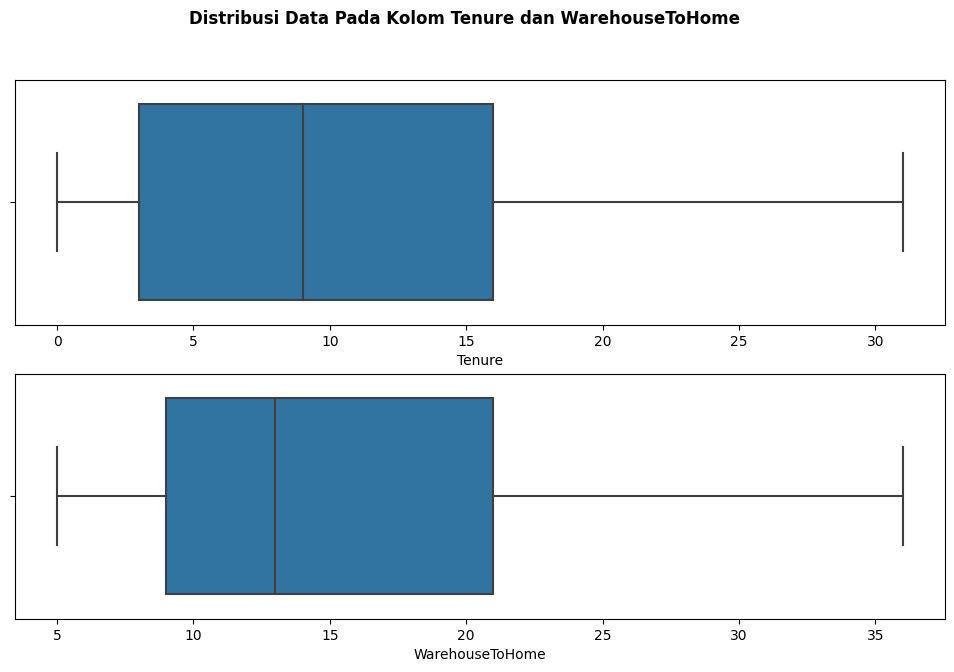

In [28]:
plt.figure(figsize=(12,7))
plt.suptitle('Distribusi Data Pada Kolom Tenure dan WarehouseToHome', weight='bold')
plt.subplot(2,1,1)
sns.boxplot(x = df_clean['Tenure'])

plt.subplot(2,1,2)
sns.boxplot(x = df_clean['WarehouseToHome'])
;


Berdasarkan visualisasi diatas sudah tidak terdapat data outlier pada kolom "Tenure" dan kolom "WarehouseToHome"

# **4. EDA (Exploratory Data Analysis)**
---

## **4.1 Target Correlation**

Dalam melakukan EDA hal pertama yang ingin dieksplor adalah terkait proporsi terhadap jumlah customer yang melakukan churn dan yang tidak melakukan churn

''

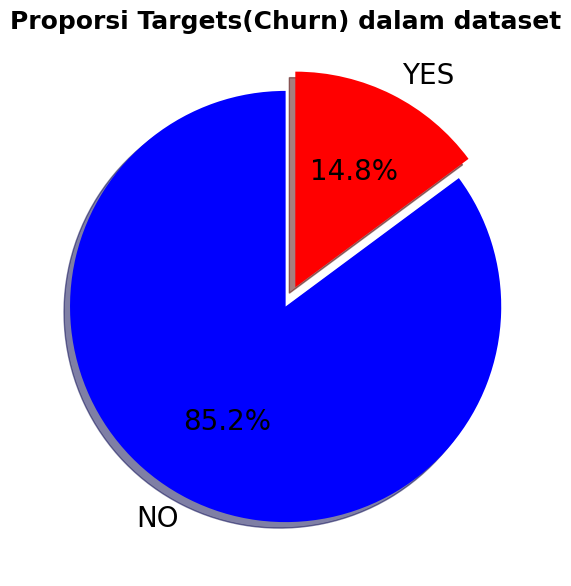

In [29]:
plt.figure(figsize=(7,7))
plt.title("Proporsi Targets(Churn) dalam dataset", size=18, weight='bold')
plt.pie(df_clean['Churn'].value_counts(), explode=(0,0.1), labels=['NO', 'YES'], colors=['blue','red'], autopct='%1.1f%%', shadow=True, startangle=90, textprops={"fontsize":20})
;

- Dari piechart diatas diketahui bahwa orang yang tidak melakukan churn terdapat sebanyak 85.9% dan yang melakukan churn sebanyak 14.8% (Angka ini bisa berubah seiring dengan proses data cleaning), Churn disini merupakan target dalam modelling yang akan dibuat, dari visualisasi ini kita dapat mengetahui bahwa data yang dimiliki adalah imbalance oleh karena itu perlu dilakukan resampling.
----

Selanjutnya kita mencari korelasi setiap hubungan kolom numerikal yang terdapat pada dataset, disini menggunakan metode 'Spearman' karena terdapat data yang tidak terdistribusi normal.

In [30]:
dfCorr = df_clean[df_clean.describe().columns].corr(method='spearman')
matriks = np.triu(dfCorr)

''

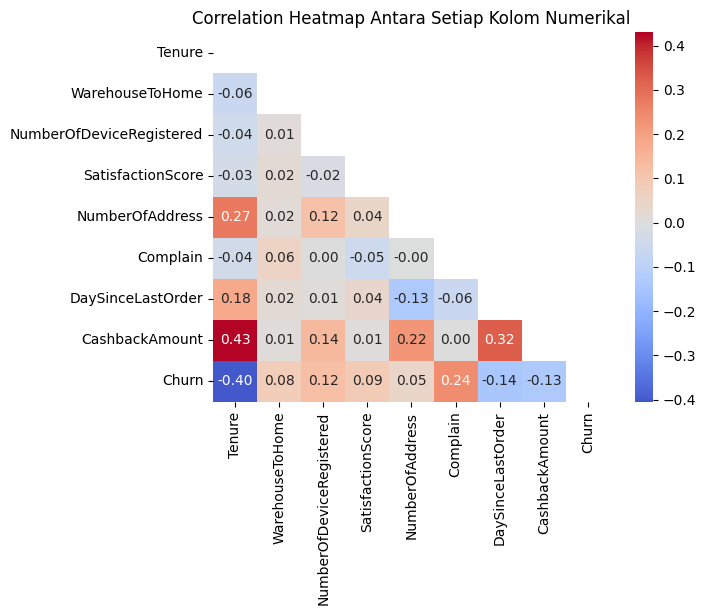

In [31]:
sns.heatmap(data=dfCorr, annot=True, cmap='coolwarm', center=0, mask=matriks, fmt='.2f')
plt.title("Correlation Heatmap Antara Setiap Kolom Numerikal")
;

Dari visualisasi tersebut diketahui bahwa:
- Yang memiliki korelasi paling kuat positif terdapat pada kolom 'Tenure' dengan kolom 'CashbackAmount'
- Sedangkan untuk korelasi kuat negatif terdapat pada kolom 'Tenure' dengan kolom 'Churn'
----

''

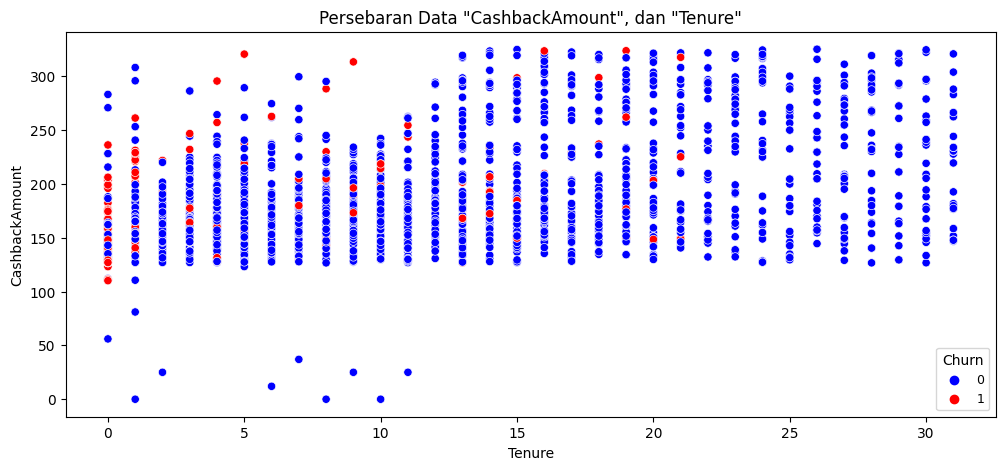

In [32]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df_clean, x='Tenure', y='CashbackAmount', hue='Churn', palette=['blue','red'])
plt.legend(loc = 'lower right', prop={'size':9},title = 'Churn')
plt.title('Persebaran Data "CashbackAmount", dan "Tenure"')
;

- Diatas merupakan persebaran data dari kolom 'Tenure' dengan kolom 'CashbackAmount' dimana orang yang melakukan churn berdasarkan visualisasi cukup banyak pada tenure < 10
---

## **4.2 Numerical to Target**

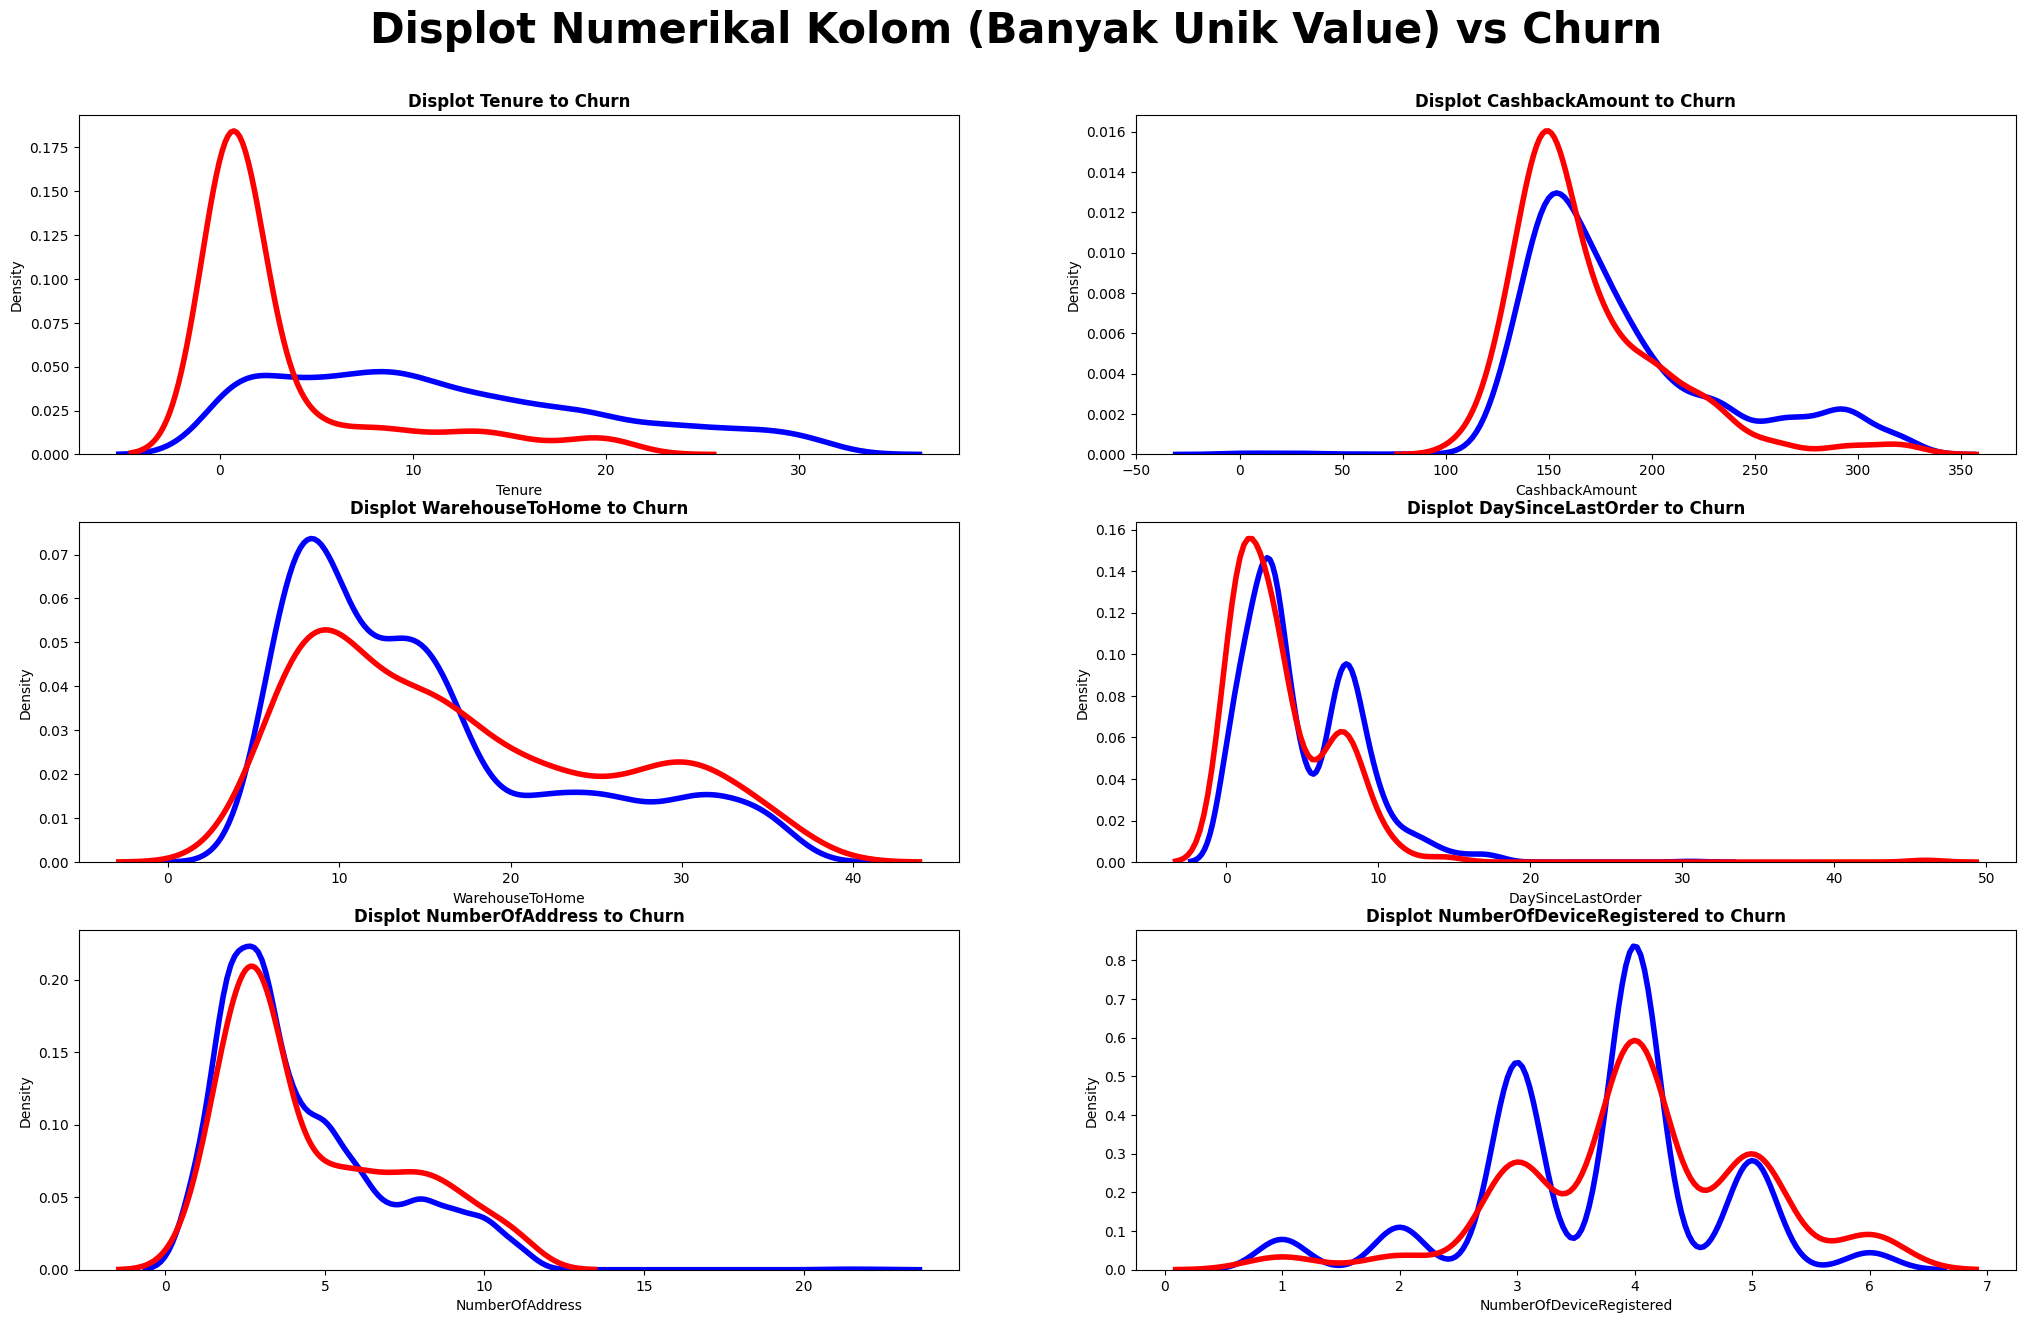

In [33]:
listKolom = ['Tenure','CashbackAmount','WarehouseToHome','DaySinceLastOrder','NumberOfAddress','NumberOfDeviceRegistered']
kolom=0
n_cols=2
n_rows=3
plt.figure(figsize=(25,15))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom== 6 : 
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            plt.title(f'Displot {listKolom[kolom]} to Churn', weight='bold')
            sns.distplot(df_clean[df_clean['Churn'] == 0][listKolom[kolom]], hist=False, kde=True, color = 'blue',kde_kws={'linewidth': 4})
            sns.distplot(df_clean[df_clean['Churn'] == 1][listKolom[kolom]], hist=False, kde=True, color = 'red',kde_kws={'linewidth': 4})
            kolom+=1
plt.suptitle('Displot Numerikal Kolom (Banyak Unik Value) vs Churn', size=30, y=0.95, weight='bold') ;

Berdasarkan visualisasi tersebut dapat diketahui bahwa:
- Customer dengan masa tenure rendah cenderung melakukan 'Churn' hal ini bisa terjadi karena belum adanya rasa nyaman atas pelayanan sebagai pengguna baru.
- Jumlah cashback paling banyak direntang $125-$175 terlepas dari customer tersebut churn atau tidak, dan direntang tersebut pula mayoritas customer melakukan churn.
- Untuk jarak rumah ke gudang terdapat pola yang sedikit abstrak karena jarak rumah yang jauh atau dekat sekalipun angka customer yang melakukan 'churn' terbilang cukup tinggi.
- Jumlah hari dari pemesanan terakhir memiliki customer 'churn' paling tinggi didalam waktu 1-10 hari, yang berarti selama melakukan transaksi terdapat pelayanan yang kurang berkesan terhadap customer, sebaliknya customer yang sudah berminggu-minggu tidak melakukan pemesanan tidak melakukan 'churn'.
- Jumlah alamat yang didaftarkan pada satu account paling banyak pada rentang 0-5 alamat dan pada rentang tersebut pula customer paling banyak melakukan churn, Jumlah alamat yang didaftarkan serta jumlah device yang didaftarkan baik customer melakukan 'churn' atau tidak, dari dua visualisasi kedua garis untuk customer 'churn' atau tidak menunjukan pola garis yang sama dan identik hal ini menunjukan bahwa jumlah alamat atau device yang didaftarkan tidak mempengaruhi 'churn' atau tidaknya seorang customer


## **4.3 Categorical to Target**

In [34]:
cat_columns = ['PreferedOrderCat','MaritalStatus','Complain','SatisfactionScore']
chi2_score = []

for i in cat_columns:
  df_chi = pd.crosstab(df_clean[i], df_clean['Churn'])
  stat, pvalue, dof, expected = chi2_contingency(df_chi)
  chi2_score.append(pvalue)

df_chi_score = pd.DataFrame({'categorical_features': cat_columns,'chi2_score': chi2_score})
df_chi_score['notes'] = np.where(df_chi_score['chi2_score'] > 0.05, 'independent', 'dependent')
df_chi_score

,categorical_features,chi2_score,notes
0,PreferedOrderCat,1.969512e-27,dependent
1,MaritalStatus,4.076912e-20,dependent
2,Complain,4.883258e-38,dependent
3,SatisfactionScore,1.300832e-05,dependent


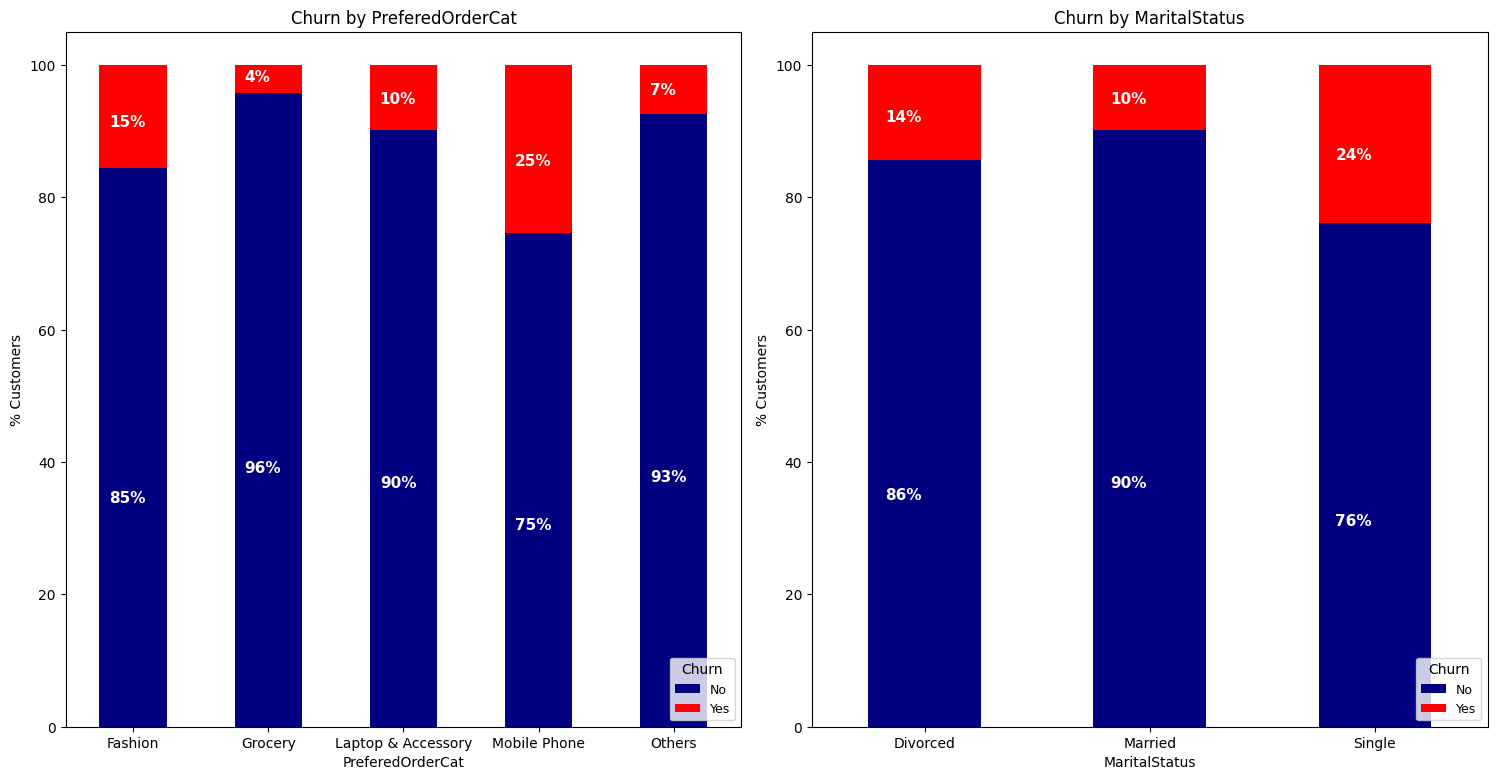

In [35]:
plt.figure(figsize=(30, 15), facecolor='white')
plotnumber = 1

for feature in ['PreferedOrderCat','MaritalStatus']:

        column1 = feature

        # membuat table berdasarkan 2 kolom kategorikal
        groupby_table = df_clean.groupby([column1,'Churn']).size().unstack()

        # fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
        def show() :
            if height > 0 :
                return '{:.0f}%'.format(height)
            else :
                return '' 
        
        # subplot (letak grafik)
        ax = plt.subplot(2, 4, plotnumber)
        
        # Harga rumah berdasarkan feature 
        (groupby_table.T*100.0 / groupby_table.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, rot = 0, ax = ax, color = ['navy', 'red'])

        ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn',labels=['No','Yes'])
        ax.set_ylabel('% Customers')
        ax.set_title(f'Churn by {column1}',size = 12)

        # menambahkan label data pada stacked bar chart
        for p in ax.patches:
            width, height = p.get_width(), p.get_height()
            x, y = p.get_xy() 
            ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height),
                        color = 'white',
                        weight = 'bold',
                        size = 11)
                
        plt.tight_layout();
        
        plotnumber += 1

Dari visualisasi tersebut dapat diketahui bahwa:
- Customer yang melakukan pembelian untuk 'Fashion' dan 'Mobile Phone' memiliki kemungkinan untuk melakukan churn paling tinggi dibanding kategori yang lainnya, oleh karena itu dari pihak e-commerce bisa melakukan sedikit *treatment* khusus untuk kategori tersebut.
- Berdasarkan status pernikahan , customer yang single memiliki kemungkinan untuk churn yang sangat tinggi diikut oleh customer yang telah bercerai lalu terakhir adalah customer yang sudah menikah. 

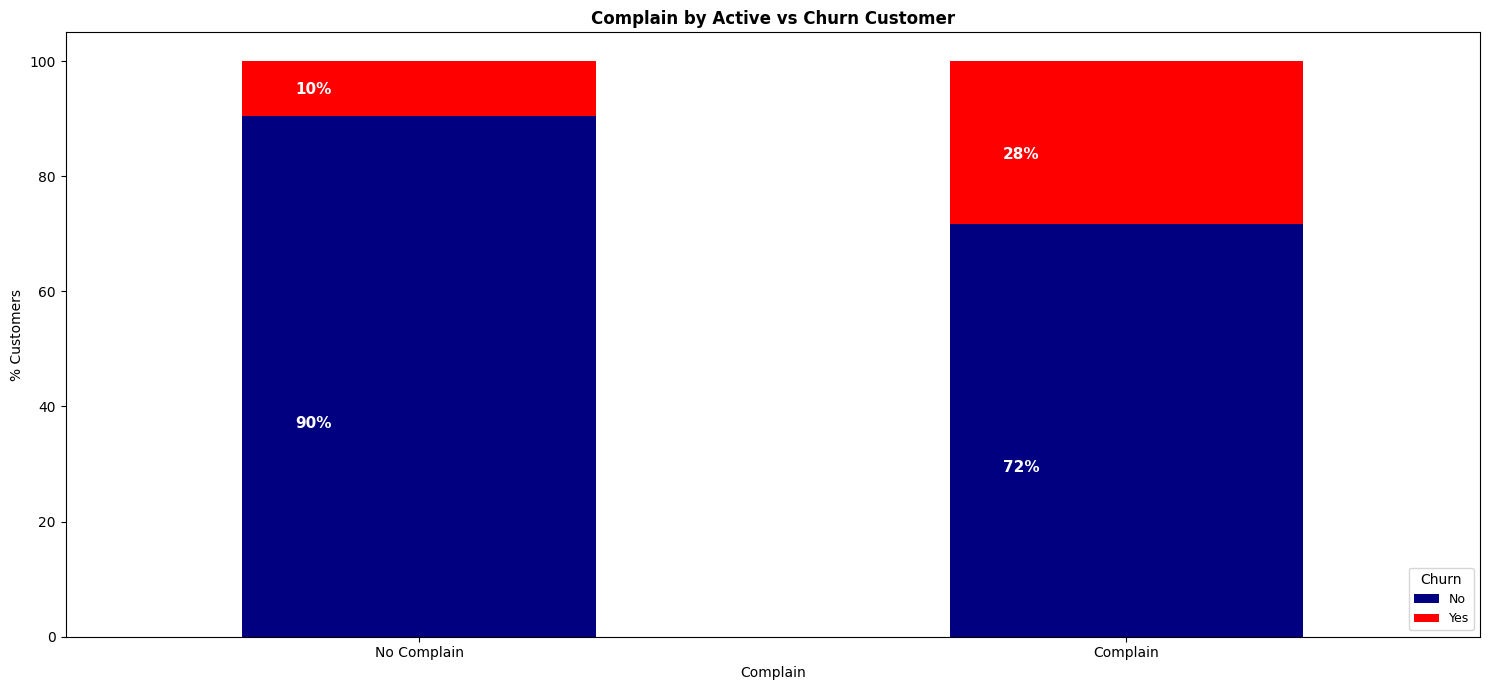

In [36]:
plt.figure(figsize=(15, 7), facecolor='white')


# membuat table berdasarkan 2 kolom kategorikal
df_complain_churn = df_clean.groupby(['Complain','Churn']).size().unstack()

# subplot (letak grafik)
ax = plt.subplot(1,1,1)

# fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
def show() :
    if height > 0 :
        return '{:.0f}%'.format(height)
    else :
        return '' 
        
# Bar persentase
(df_complain_churn.T*100.0 / df_complain_churn.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, rot = 0, ax = ax, color = ['navy', 'red'])

ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn',labels=['No','Yes'])
ax.set_ylabel('% Customers')
ax.set_title(f'Complain by Active vs Churn Customer',size = 12, weight='bold')
ax.set_xticklabels(('No Complain', 'Complain'))

# menambahkan label data pada stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 11)
                
plt.tight_layout();


Dari diagram diatas diketahui bahwa:
- Pelanggan yang melakukan complain cenderung memiliki kemungkinan melakukan 'churn' yang tinggi, hampir sebanyak 28% customer yang melakukan complain pasti 'churn', hal ini bisa saja terjadi karena bentuk complain atau rasa tidak nyaman yang disampaikan kurang direspon dengan baik oleh pihak perusahaan sehingga customer memutuskan untuk 'churn'

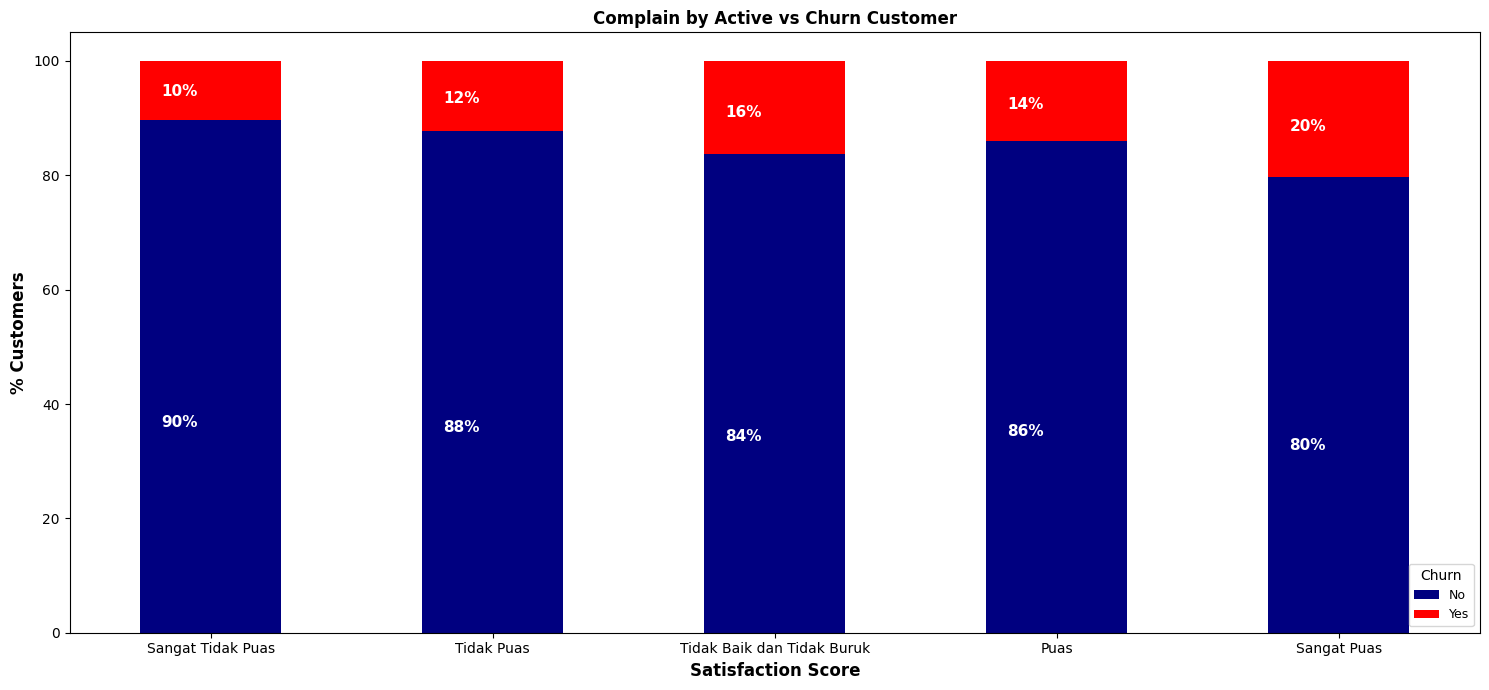

In [37]:
plt.figure(figsize=(15, 7), facecolor='white')


# membuat table berdasarkan 2 kolom kategorikal
df_complain_churn = df_clean.groupby(['SatisfactionScore','Churn']).size().unstack()

# subplot (letak grafik)
ax = plt.subplot(1,1,1)

# fungsi untuk pelabelan dimana jika nilainya 0 tidak akan ditampilkan
def show() :
    if height > 0 :
        return '{:.0f}%'.format(height)
    else :
        return '' 
        
# Bar persentase
(df_complain_churn.T*100.0 / df_complain_churn.T.sum()).T.plot(kind='bar', width = 0.5, stacked = True, rot = 0, ax = ax, color = ['navy', 'red'])

ax.legend(loc = 'lower right', prop={'size':9},title = 'Churn', labels=['No','Yes'])
ax.set_ylabel('% Customers', size=12, weight='bold')
ax.set_xlabel('Satisfaction Score', size=12, weight='bold')
ax.set_title(f'Complain by Active vs Churn Customer',size = 12, weight='bold')
ax.set_xticklabels(('Sangat Tidak Puas', 'Tidak Puas', 'Tidak Baik dan Tidak Buruk', 'Puas', 'Sangat Puas'))

# menambahkan label data pada stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(show(), (p.get_x()+0.15*width, p.get_y()+.4*height), color = 'white', weight = 'bold', size = 11)
                
plt.tight_layout();

Dari visualisasi ini terdapat hal yang tidak wajar karena, customer yang memiliki skor kepuasan yang sangat tinggi justru memiliki kemungkinan 'churn' yang tinggi. Berbanding terbalik dengan customer yang memiliki skor kepuasan yang rendah justru memiliki kemungkinan 'churn' yang rendah juga. Hal ini mungkin bisa saja terjadi karena ketidak seriusan customer dalam melakukan pengisian kuesioner. Tetapi tidak menutup kemungkinan juga bahwa customer dengan skor kepuasan rendah memiliki kemungkinan 'churn' rendah. Karena kepuasan jika dibentuk dengan skala 1-5 dengan parameter sangat tidak puas hingga sangat puas masih subjektif, bisa saja seorang customer mengukur ketidak puasan karena lambatnya pelayanan tapi tetap bertahan karena hal seperti promo, discount, atau cashback yang diberikan variasi dari barang yang dijual dsb. Begitu pula hal sebaliknya untuk customer dengan skor sangat puas. 

# **5. Data Preprocessing**
---

## **5.1 Scalling**

Dalam melakukan permodelan diharapkan memiliki skala yang sama sehingga akan maksimal dalam target. jika tidak dilakukan scaling maka variabel dengan skala besar akan mendominasi yang kecil. Pada data numerikal masih terdapat beberapa data yang tidak terdistribusi dengan normal sehingga akan digunakan 'RobustScaler' sebagai metode scaling.

In [38]:
# Scaling Features
robust = RobustScaler()

## **5.2 Imputer**

In [39]:
df_clean.isna().sum()

Tenure                        0
WarehouseToHome               0
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

Dari dataset diketahui terdapat satu kolom yang memiliki missing value, hal ini terus berkurang seiring dengan berjalannya proses data cleaning.
Pada pemodelan ini untuk missing values tidak akan di drop ataupun mengganti nilai dengan mean/median/modus secara manual, tetapi nilai dari missing value akan diisi dengan menggunakan simple imputer untuk menghindari *adanya data leakage*, *data leakage* sendiri merupakan suatu keadaan dimana saat pembuat model secara tidak sengaja menyebarkan informasi antara train-set dengan test-set, Dalam split data sendiri memiliki tujuan untuk tidak terdapat data yang dibagikan antara train-set dan test-set, Karena fungsi dari test-set untuk melakukan simulasi data yang real yang asumsinya data tersebut tidak diketahui.

In [40]:
median_simputer = SimpleImputer(strategy='median')

## **5.3 Encode**

Dalam encoding ini akan dibantu dengan ColumnTransformer sebagai salah satu langkah dalam preprocessing, Disini akan mengubah feature 'MaritalStatus' dan 'PreferedOrderCat' yang sebelumnya berbentuk kategori menjadi numerikal dengan bantuan One Hot Encoder, karena kedua kolom ini memiliki unique value yang sedikit dan tidak terdapat kelas atau urutan(ordinal) pada setiap nilai kategori didalam kolom tersebut.

In [41]:
transformer=ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['MaritalStatus', 'PreferedOrderCat']),
    ('median_simputer', median_simputer, ['DaySinceLastOrder'])
],remainder='passthrough')

## **5.4 Define Feature, Target and Split Data**

Sebelum melakukan modelling, akan ditentukan terlebih dahulu yang menjadi feature dan label pada kasus ini, feature sendiri merupakan variabel input yang digunakan untuk menggambarkan objek atau data yang akan diklasifikasikan. Fitur dapat berupa numerik atau kategorikal, dalam kasus ini feature merupakan setiap kolom selain kolom 'Churn'.<br>
Sedangkan label atau target adalah variabel yang menadi output dalam klasifikasi. Label menggambarkan kelas atau kategori yang sebenarnya dari objek atau data. dalam kasus ini labelnya terdapat pada kolom 'Churn'.

In [42]:
# Define Feature
X = df_clean.drop(columns='Churn')

# Define Target
y = df_clean['Churn']

Setelah menentukan feature dan label selanjutnya melakukan splitting data menjadi data train dan data test. <br>
Data train adalah kumpulan data yang digunakan untuk melatih model machine learning. Data train terdiri dari feature dan label yang sudah diketahui yang selanjutnya model akan mempelajari serta mengidentifikasi pola dan hubungan antara feature dan label.<br>
Sedangkan data test adalah kumpulan data yang digunakan untuk menguji kinerja model machine learning setelah proses train. Pada data test memberikan feature tanpa menyertakan label. Model dari machine learning akan membuat prediksi label untuk data test, yang kemudian dapat dibandingkan dengan label sebenarnya untuk mengetahui keakuratan (matrix evaluasi)

In [43]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

Dataframe dibawah ini sebagai input untuk mengetahui letak kolom kategorikal yang telah diencoding sebagai keperluan parameter untuk metode resampling SMOTENC

In [44]:
pd.DataFrame(transformer.fit_transform(X_train),columns=transformer.get_feature_names_out()).head()

,one hot__MaritalStatus_Married,one hot__MaritalStatus_Single,one hot__PreferedOrderCat_Grocery,one hot__PreferedOrderCat_Laptop & Accessory,one hot__PreferedOrderCat_Mobile Phone,one hot__PreferedOrderCat_Others,median_simputer__DaySinceLastOrder,remainder__Tenure,remainder__WarehouseToHome,remainder__NumberOfDeviceRegistered,remainder__SatisfactionScore,remainder__NumberOfAddress,remainder__Complain,remainder__CashbackAmount
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,6.0,8.0,5.0,4.0,2.0,0.0,147.69
1,1.0,0.0,0.0,1.0,0.0,0.0,7.0,4.0,13.0,3.0,2.0,5.0,0.0,175.47
2,1.0,0.0,0.0,1.0,0.0,0.0,5.0,18.0,32.0,4.0,5.0,2.0,0.0,143.85
3,1.0,0.0,0.0,1.0,0.0,0.0,3.0,22.0,9.0,2.0,4.0,5.0,0.0,206.20
4,1.0,0.0,1.0,0.0,0.0,0.0,10.0,18.0,26.0,3.0,1.0,1.0,1.0,234.96


## **5.5 Resampler**

Dari informasi dataset sebelumnya proporsi target yang dimiliki diidentifikasi sebagai imbalance yaitu dengan perbandingan 85:15 oleh karena itu dilakukan upaya resampling terhadap data dengan tujuan untuk distribusi data yang lebih seimbang. Dengan ini dilakukan berbagai metode Under Sampling dan Over Sampling untuk melihat parameter mana yang lebih maksimal dalam permodelan kasus ini.

In [45]:
smotenc = SMOTENC(random_state=0, categorical_features=[0, 1, 2, 3, 4, 5]) 
smote = SMOTE(random_state=0)
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)

# **6. Modelling**
---

Dalam melakukan modelling yang ditahap ini akan dilakukan cross validation. Cross validation adalah teknik yang digunakan untuk melakukan estimasi kinerja model dari machine learning pada data baru yang belum pernah diketahui sebelumnya. Dalam cross validation sendiri data train dibagi menjadi beberapa bagian (folds), dimana model machine learning dilatih pada sebagian folds dan diuji pada folds yang tersisa. Proses ini dilakukan secara repetitif beberapa kali dengan bagian(folds) yang berbeda, dan hasilnya dirata-ratakan untuk menghasilkan kinerja yang lebih stabil.

## **6.1 Define Model**

Berikut beberapa model klasifikasi yang akan digunakan. Terdapat 7 model yang akan digunakan yaitu logistic regression, KNeighbors Classifier, Decision Tree, Random Forest, Adaboost, Gradient Boosting, Xtreme Gradient Boost.

In [46]:
logreg=LogisticRegression(random_state=42)
knn=KNeighborsClassifier(n_neighbors=7)
tree=DecisionTreeClassifier(random_state=42,max_depth=3)
rf = RandomForestClassifier(random_state=42,max_depth=3)
ada=AdaBoostClassifier(tree,learning_rate=0.1,random_state=42)
gbc=GradientBoostingClassifier(learning_rate=0.1,random_state=42,max_depth=3)
xgb = XGBClassifier(random_state=42, verbosity=0)

Seperti disebut sebelumnya bahwa dalam cross validation data akan dibagi menjadi beberapa bagian(folds) dalam hal ini menjadi 5 folds

In [47]:
skfold= StratifiedKFold(n_splits = 5)

Score yang digunakan adalah f2 score sesuai dengan business understanding yang telah dijelaskan sebelumnya bahwa kita ingin memfokuskan terhadap nilai recall tanpa mengacuhkan precision

In [48]:
# create scorer/metric
f2_score = make_scorer(fbeta_score, beta=2)

## **6.2 Cross Validation (Benchmark Model)**

In [49]:
models = [logreg, knn, tree, rf, ada, gbc, xgb]

mean_with_sampling = []
std_with_sampling = []
mean_without_sampling = []
std_without_sampling = []
list_score_with_sampling=[]
list_score_without_sampling=[]


for model in  models :

    # modeling with oversampling
    pipe_model_with_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', robust),
        ('resample', smotenc),
        ('model', model)
    ])

    model_cv_with_sampling = cross_val_score(
        estimator = pipe_model_with_sampling,
        X = X_train,
        y = y_train,
        cv = skfold,
        scoring = f2_score,
        n_jobs = -1
    )
    mean_with_sampling.append(model_cv_with_sampling.mean())
    std_with_sampling.append(model_cv_with_sampling.std())
    list_score_with_sampling.append(model_cv_with_sampling.round(3))

    # modeling without oversampling
    pipe_model_without_sampling = Pipeline([
        ('prep', transformer),
        ('scaler', robust),
        ('model', model)
    ])

    model_cv_without_sampling = cross_val_score(
        estimator = pipe_model_without_sampling,
        X = X_train,
        y = y_train,
        cv = skfold,
        scoring = f2_score,
        n_jobs = -1
    )
    
    mean_without_sampling.append(model_cv_without_sampling.mean())
    std_without_sampling.append(model_cv_without_sampling.std())
    list_score_without_sampling.append(model_cv_without_sampling.round(3))

In [50]:
df_crossval_wo_sampling = pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost','XGB'],
    'mean_F2_without_sampling' : mean_without_sampling,
    'std_F2_without_sampling' : std_without_sampling,
    'score' :list_score_without_sampling
}).sort_values('mean_F2_without_sampling', ascending=False)
df_crossval_wo_sampling

,model,mean_F2_without_sampling,std_F2_without_sampling,score
6,XGB,0.670310,0.049882,"[0.745, 0.665, 0.674, 0.588, 0.679]"
5,GradienBoost,0.582810,0.045723,"[0.632, 0.549, 0.612, 0.511, 0.61]"
4,AdaBoost,0.494801,0.039562,"[0.565, 0.466, 0.506, 0.453, 0.483]"
2,Decision Tree,0.491547,0.028931,"[0.488, 0.527, 0.506, 0.44, 0.497]"
0,Logistic Regression,0.472760,0.030227,"[0.491, 0.439, 0.508, 0.434, 0.492]"
1,KNN,0.335566,0.057222,"[0.423, 0.328, 0.293, 0.261, 0.372]"
3,Random Forest,0.076299,0.025367,"[0.103, 0.035, 0.07, 0.069, 0.103]"


''

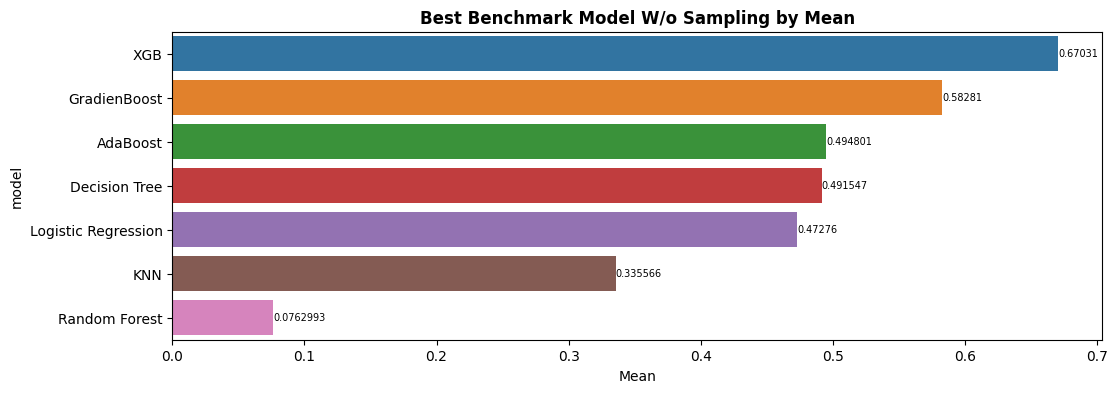

In [51]:
plt.figure(figsize=(12,4))
plot = sns.barplot(df_crossval_wo_sampling, y='model', x= 'mean_F2_without_sampling')
plt.title('Best Benchmark Model W/o Sampling by Mean', weight='bold')
plt.xlabel('Mean')
for bars in plot.containers:
    plot.bar_label(bars, size=7)
;

- Dalam akurasi model tanpa menggunakan sampling, model XGboost memiliki akurasi yang paling tinggi yaitu sekitar 67% yang selanjutnya diikuti model gradientboost sekitar 58% dan yang paling rendah adalah randomfores dengan akurasi sebesar 7.6%
---

In [52]:
df_cv_smote = pd.DataFrame({
    'model' : ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost','XGB'],
    'mean_F2_with_SMOTENC' : mean_with_sampling,
    'std_F2_with_SMOTENC' : std_with_sampling,
    'score' : list_score_with_sampling
}).sort_values('mean_F2_with_SMOTENC', ascending=False)
df_cv_smote

,model,mean_F2_with_SMOTENC,std_F2_with_SMOTENC,score
6,XGB,0.677061,0.045328,"[0.726, 0.676, 0.712, 0.596, 0.674]"
0,Logistic Regression,0.662915,0.004135,"[0.662, 0.67, 0.664, 0.657, 0.661]"
5,GradienBoost,0.655134,0.020845,"[0.652, 0.676, 0.663, 0.617, 0.668]"
3,Random Forest,0.647741,0.029058,"[0.643, 0.677, 0.604, 0.633, 0.682]"
4,AdaBoost,0.621160,0.035042,"[0.556, 0.618, 0.652, 0.632, 0.649]"
2,Decision Tree,0.610345,0.044909,"[0.551, 0.685, 0.591, 0.595, 0.631]"
1,KNN,0.602339,0.038721,"[0.619, 0.633, 0.638, 0.532, 0.59]"


''

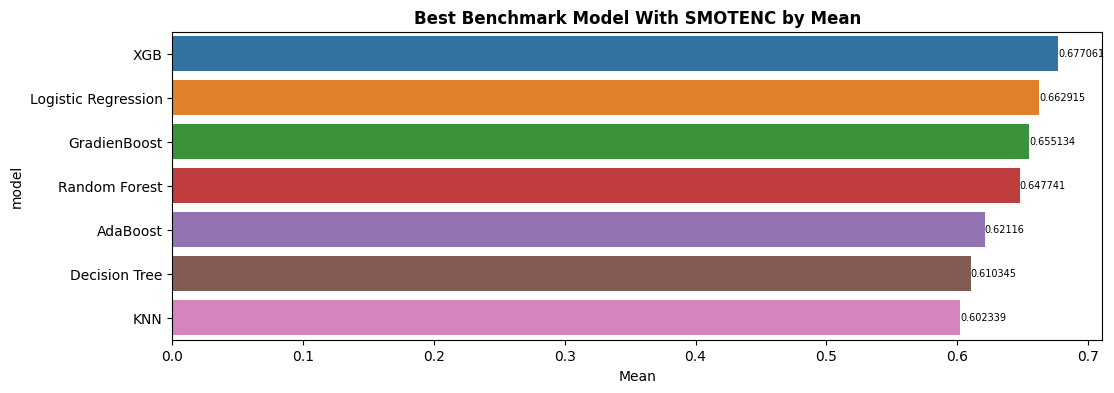

In [54]:
plt.figure(figsize=(12,4))
plot = sns.barplot(df_cv_smote, y='model', x= 'mean_F2_with_SMOTENC')
plt.title('Best Benchmark Model With SMOTENC by Mean', weight='bold')
plt.xlabel('Mean')
for bars in plot.containers:
    plot.bar_label(bars, size=7)
;

- Setelah dilakukan resampler untuk setiap model, XGboost masih tetap menjadi model dengan akurasi yang paling tinggi yaitu sekitar 67% diikut oleh model logistic regression dan gradient boost masing-masing sebesar 66% dan 65% dan yang paling rendah yaitu model KNN yaitu sebesar 60%
- Tidak terdapat perbedaan yang cukup jauh untuk setiap model, berbeda dengan sebelumnya yang tanpa resampler jarak antara tiap model masih terhitung cukup jauh.
- Pada model random forest terjadi peningkatan akurasi yang cukup tinggi dimana sebelumnya 7.6% naik menjadi 64%

## **6.3 Predict Benchmark Model to Test Set**

In [ ]:
list_f2_score = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    score = fbeta_score(y_test, y_pred, beta=2)
    list_f2_score.append(score)

In [ ]:
# Perbandingan performa antar model
df_toTestSet = pd.DataFrame({
    'model':['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'AdaBoost', 'GradienBoost','XGB'],
    'f2_score (test_set)': list_f2_score,
}).sort_values('f2_score (test_set)', ascending=False)
df_toTestSet

,model,f2_score (test_set)
6,XGB,0.699052
5,GradienBoost,0.645933
4,AdaBoost,0.596107
2,Decision Tree,0.554217
0,Logistic Regression,0.529557
1,KNN,0.430380
3,Random Forest,0.111111


Setelah melakukan predict ke data train, disini ingin dicoba untuk melakukan predict ke data test untuk melihat kestabilan dari model. Pada XGBoost masih menjadi model dengan akurasi yang paling tinggi yaitu sekitar 69% dan diikuti oleh model gradientboost yaitu sekita 64%. Akurasi model ini tidak menentukan model mana yang akan dituning karena tidak terdapat kestabilan akurasi dengan score dari folds pada data train.

# **7. Hyperparameter Tuning**
---

Setelah melakukan Cross Validation selanjutnya akan dilakukan Hyperparameter Tuning terhadap 3 model terbaik berdasarkan akurasi dengan data train yaitu XGboost, Logistic Regresion, dan Gradien Boost.<br>
Dalam proses tuning digunakan metode Randomize Search karena dirasa parameter pada tuning dari 3 model terlalu banyak dan untuk mempersingkat proses dan waktu tuning dilakukan dengan iterasi masing-masing model sebanyak 1000.

## **7.1 Tuning Xtreme Gradient Boost**

In [ ]:
# kedalaman pohon
max_depth = list(np.arange(1,11))

# learning rate
learning_rate = list(np.arange(0.01, 1.0, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2, 1.0, 0.1))

# gamma (min_impurity_decrease)
gamma = list(np.arange(1,11))

# jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(0.1, 1.0, 0.2))

# Hyperparam space XGboost
hyperparam_space_xgboost = {
    'balancing':[smotenc, smote, rus, ros, None],
    'model__max_depth':max_depth, 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__gamma':gamma,
    'model__colsample_bytree':colsample_bytree,
}

In [ ]:
# Algorithm chains
estimator_xgboost=Pipeline([
    ('processing',transformer),
    ('balancing',[ros, rus, smote, smotenc, None ]),
    ('model',xgb)
    ])

In [ ]:
# Hyperparameter tuning
random_xgboost = RandomizedSearchCV(
    estimator_xgboost, 
    param_distributions = hyperparam_space_xgboost, 
    cv = skfold, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=42,
    n_iter=1000
)

In [ ]:
# fitting 
random_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('processing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MaritalStatus',
                                                                                'PreferedOrderCat']),
                                                                              ('median_simputer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['DaySinceLastOrder'])])),
                                             ('balancing',
                                              [Ra...
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001]},
                   random_state=42, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_xgboost.best_score_

0.7471272636058166

In [ ]:
random_xgboost.best_params_

{'model__subsample': 0.8000000000000003,
 'model__n_estimators': 123,
 'model__max_depth': 6,
 'model__learning_rate': 0.18000000000000002,
 'model__gamma': 8,
 'model__colsample_bytree': 0.9000000000000001,
 'balancing': RandomOverSampler(random_state=0)}

Setelah melakukan tuning terhadap Xgboost dengan skor akurasi yaitu 74.71% dan parameter terbaiknya adalah 
'model__subsample': 0.8, <br>
'model__n_estimators': 123, <br>
'model__max_depth': 6, <br>
'model__learning_rate': 0.18, <br>
'model__gamma': 8, <br>
'model__colsample_bytree': 0.9, <br>
'balancing': RandomOverSampler(random_state=0) <br>

selanjutnya untuk model ini akan diuji untuk melihat akurasinya dengan test set

In [ ]:
best_xgboost = random_xgboost.best_estimator_

In [ ]:
best_xgboost.fit(X_train, y_train)
y_pred_best_xgboost = best_xgboost.predict(X_test)

In [ ]:
fbeta_score(y_test, y_pred_best_xgboost, beta=2)

0.8187772925764192

Akurasi F2 Score yang didapatkan kepada test set dengan model XGBoost adalah 81%

## **7.2 Tuning Logistic Regression**

In [ ]:
# Benchmark model 2
hyperparam_space_logreg = {
    'model__penalty' :['l1','l2','elasticnet', None],
    'model__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],       
    'resampler' : [None, smote, rus, ros, smotenc],
    'scaler' : [robust],
}

# Create the algorithm chains
estimator_logreg = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', logreg)
])

# Hyperparameter tuning
random_logreg = RandomizedSearchCV(
    estimator=estimator_logreg, 
    param_distributions = hyperparam_space_logreg, 
    cv = skfold, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [ ]:
random_logreg.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MaritalStatus',
                                                                                'PreferedOrderCat']),
                                                                              ('median_simputer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['DaySinceLastOrder'])])),
                                             ('scaler', Robust...
                                                           'elasticnet', None],
                                        'model__solver': ['lbfgs', 'liblinear',
                                                          'newton-cg',
                                                          'newton-cholesky',
                                                          'sag', 'saga'],
                                        'resampler': [None,
                                                      SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      SMOTENC(categorical_features=[0,
                                                                                    1,
                                                                                    2,
                                                                                    3,
                                                                                    4,
                                                                                    5],
                                                              random_state=0)],
                                        'scaler': [RobustScaler()]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_logreg.best_score_

0.677343371345342

In [ ]:
random_logreg.best_params_

{'scaler': RobustScaler(),
 'resampler': RandomUnderSampler(random_state=0),
 'model__solver': 'saga',
 'model__penalty': 'l1',
 'model__C': 1}

Dengan menggunakan Logistic Regression didapatkan akurasi sebesar 67.73% dengan parameter terbaik adalah 
'scaler': RobustScaler(),<br>
'resampler': RandomUnderSampler(random_state=0),<br>
'model__solver': 'saga',<br>
'model__penalty': 'l1',<br>
'model__C': 1

In [ ]:
best_logreg = random_logreg.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred_best_logreg = best_logreg.predict(X_test)

In [ ]:
fbeta_score(y_test, y_pred_best_logreg, beta=2)

0.7421150278293136

Seterlah dilakukan prediksi dengan model logistik regression terhadap data test didapatkan akurasi sebesar 74.21%

## **7.3 Tuning Gradient Boost**

In [ ]:
# Benchmark model 3

# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(100,201))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2,1,0.1))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'resampler':[smotenc, smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('preprocess', transformer),
    ('resampler', smotenc), 
    ('model', gbc)
    ])

# Hyperparameter tuning
random_gbc = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skfold, 
    scoring = f2_score, 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [ ]:
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('one '
                                                                               'hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['MaritalStatus',
                                                                                'PreferedOrderCat']),
                                                                              ('median_simputer',
                                                                               SimpleImputer(strategy='median'),
                                                                               ['DaySinceLastOrder'])])),
                                             ('resampler',
                                              SMO...
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001],
                                        'resampler': [SMOTENC(categorical_features=[0,
                                                                                    1,
                                                                                    2,
                                                                                    3,
                                                                                    4,
                                                                                    5],
                                                              random_state=0),
                                                      SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
random_gbc.best_score_

0.7590533683361282

In [ ]:
random_gbc.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'model__subsample': 0.8000000000000003,
 'model__n_estimators': 196,
 'model__max_features': 8,
 'model__max_depth': 9,
 'model__learning_rate': 0.09}

Setelah melakukan tuning untuk model Gradient Boost didapatkan akurasi sebesar 75.9% dengan parameter terbaiknya yaitu<br>
'resampler': RandomUnderSampler(random_state=0)
'model__subsample': 0.8<br>
'model__n_estimators': 196<br>
'model__max_features': 8<br>
'model__max_depth': 9<br>
'model__learning_rate': 0.09<br>

In [ ]:
best_gbc = random_gbc.best_estimator_

In [ ]:
best_gbc.fit(X_train, y_train)
y_pred_best_gbc = best_gbc.predict(X_test)

In [ ]:
fbeta_score(y_test, y_pred_best_gbc, beta=2)

0.8401639344262296

Akurasi F2 Score yang didapatkan kepada test set dengan model XGBoost adalah 84%

## **7.4 Best Model**

Setelah melakukan Hyperparameter tuning terhadap 3 model yaitu XGBoost, Logistic Regression, dan Gradient Boost yang selanjutnya diuji prediksi ke data train Didapatkan hasil sebagai berikut. <br>

**XGBoost** dengan akurasi 74.71% <br>
**Logistic Regression** dengan akurasi 67.73% <br>
**Gradient Boost** dengan akurasi 75.9% <br>

untuk akurasi dari XGBoost dan Gradient Boost tidak memiliki perbedaan yang cukup jauh, selanjutnya dilakukan uji terhadap data test.

Dan akurasi setelah dilakukan prediksi ke data test<br>
**XGBoost** dengan akurasi 81.87% <br>
**Logistic Regression** dengan akurasi 74.21% <br>
**Gradient Boost** dengan akurasi 84% <br>

Setelah melihat F2 Score Test, Model yang paling baik adalah Gradient Boosting.<br> 
Gradient boosting merupakan algoritma klasifikasi machine learning yang menggunakan ensamble dari decision tree untuk memprediksi nilai. Gradient boosting termasuk supervised learning berbasis decision tree yang dapat digunakan untuk klasifikasi. Gradient boosting dimulai dengan menghasilkan pohon klasifikasi awal dan terus menyesuaikan pohon baru melalui minimalisasi fungsi kerugian (Natekin dan Knoll, 2013).


Algoritma bekerja dengan cara membangun model secara sekuensial, di mana setiap model baru dibangun untuk mengkoreksi kesalahan dari model sebelumnya. Model awal dibangun dengan menggunakan satu variabel prediktor, kemudian error antara nilai prediksi dan nilai sebenarnya dihitung. Model berikutnya kemudian dibangun untuk memprediksi residual (error) dari model sebelumnya, dan proses ini terus berulang sampai mencapai jumlah model yang diinginkan.

Pada setiap tahap, algoritma gradient boosting menggunakan teknik gradient descent untuk mencari parameter optimal dari model decision tree baru sehingga dapat meminimalkan error dari model sebelumnya. Hasil akhir dari algoritma gradient boosting adalah hasil prediksi yang merupakan jumlah tertimbang dari prediksi dari semua model dalam ensemble.

Reference : [Mengenal Teknik Gradient Boosting Dalam Algoritma Machine Learning](https://lab_adrk.ub.ac.id/id/mengenal-teknik-gradient-boosting-dalam-algoritma-machine-learning/)

## **7.5 Best Model  : Model Properties**

In [ ]:
pd.set_option('display.max_columns', None)
df_top_params_random_xgb = pd.DataFrame(random_gbc.cv_results_).sort_values(by='rank_test_score').head()
df_top_params_random_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_model__subsample,param_model__n_estimators,param_model__max_features,param_model__max_depth,param_model__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
269,2.710743,0.025396,0.018993,0.004929,RandomUnderSampler(random_state=0),0.8,196,8,9,0.09,{'resampler': RandomUnderSampler(random_state=...,0.786802,0.778894,0.763547,0.758706,0.707317,0.759053,0.027787,1
375,0.684320,0.019821,0.010764,0.007807,RandomUnderSampler(random_state=0),0.9,144,4,9,0.68,{'resampler': RandomUnderSampler(random_state=...,0.779703,0.760599,0.772947,0.763547,0.716049,0.758569,0.022317,2
621,0.704323,0.012358,0.015117,0.000401,RandomUnderSampler(random_state=0),0.9,169,6,7,0.71,{'resampler': RandomUnderSampler(random_state=...,0.769231,0.775000,0.772947,0.740291,0.716049,0.754704,0.023055,3
663,1.606690,0.081989,0.018895,0.000636,RandomUnderSampler(random_state=0),0.7,153,4,8,0.1,{'resampler': RandomUnderSampler(random_state=...,0.759494,0.763359,0.771144,0.747549,0.730198,0.754349,0.014277,4
676,1.739413,0.040226,0.018804,0.000823,RandomUnderSampler(random_state=0),0.9,186,7,8,0.23,{'resampler': RandomUnderSampler(random_state=...,0.763359,0.804020,0.760599,0.726601,0.714286,0.753773,0.031499,5


In [ ]:
best_model_random_gbc = random_gbc.best_estimator_

### **7.4.1 Feature Importances**

In [ ]:
best_model_random_gbc['model'].feature_importances_

array([0.00756447, 0.02338663, 0.004626  , 0.0183078 , 0.0128598 ,
       0.00570187, 0.07071878, 0.38377037, 0.09859832, 0.04336205,
       0.05423752, 0.07124127, 0.04619005, 0.15943508])

In [ ]:
feature_onehot = list(best_model_random_gbc['preprocess'].transformers_[0][1].get_feature_names_out())
feature_imputer = list(best_model_random_gbc['preprocess'].transformers_[1][1].get_feature_names_out())
feature_remainder = list(X.columns[best_model_random_gbc['preprocess'].transformers_[2][2]])
feature_names = feature_onehot + feature_imputer + feature_remainder
feature_names

['MaritalStatus_Married',
 'MaritalStatus_Single',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'DaySinceLastOrder',
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'CashbackAmount']

In [ ]:
df_importances = pd.DataFrame({
    'features' : feature_names,
    'importance' : best_model_random_gbc['model'].feature_importances_
}).sort_values('importance', ascending=False)

df_importances

,features,importance
7,Tenure,0.383770
13,CashbackAmount,0.159435
8,WarehouseToHome,0.098598
11,NumberOfAddress,0.071241
6,DaySinceLastOrder,0.070719
10,SatisfactionScore,0.054238
12,Complain,0.046190
9,NumberOfDeviceRegistered,0.043362
1,MaritalStatus_Single,0.023387
3,PreferedOrderCat_Laptop & Accessory,0.018308


''

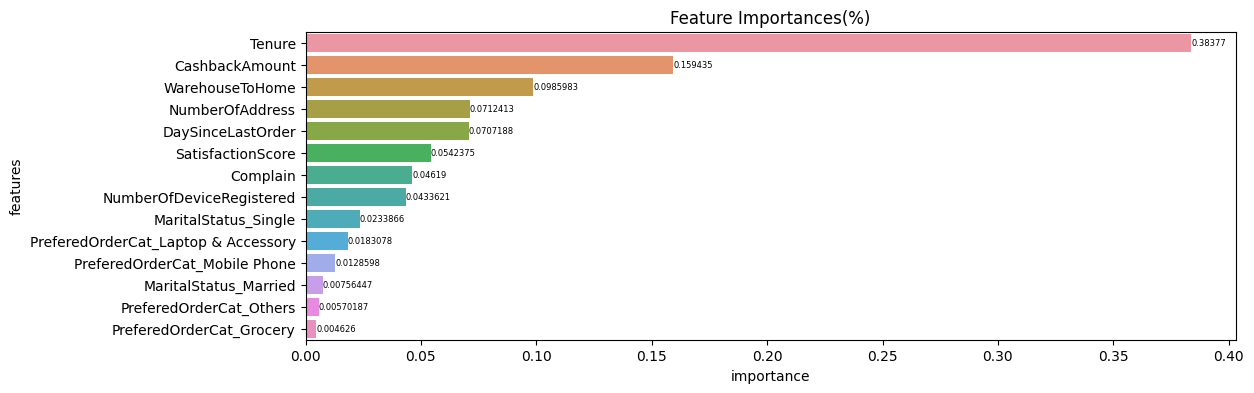

In [ ]:
plt.figure(figsize=(12,4))
plot = sns.barplot(df_importances, y='features', x= 'importance')
plt.title('Feature Importances(%)')
for bars in plot.containers:
    plot.bar_label(bars, size=6)
;

### **7.4.2 Confussion Matrix**

In [ ]:
best_model_random_gbc.fit(X_train,y_train)
y_pred_after=best_model_random_gbc.predict(X_test)
print(classification_report(y_test,y_pred_after))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       506
           1       0.60      0.93      0.73        88

    accuracy                           0.90       594
   macro avg       0.79      0.91      0.83       594
weighted avg       0.93      0.90      0.91       594



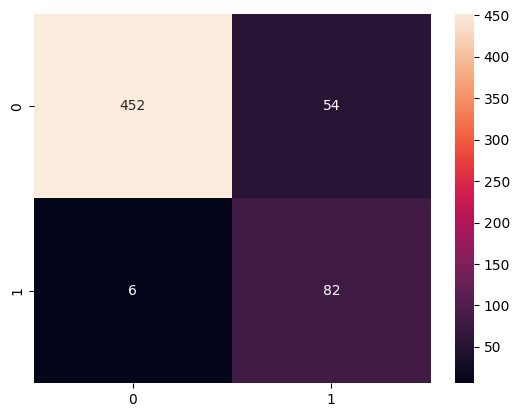

In [ ]:
confusion_matrix(y_test, y_pred_after)
sns.heatmap(confusion_matrix(y_test, y_pred_after), annot=True, fmt='g');

### **7.4.3 Cost Evaluation**

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon customer yang aktualnya churn dan diprediksi akan churn (True Positive) : 82 orang
- Jumlah calon customer yang aktualnya churn tetapi diprediksi tidak akan churn (False Negative) : 6 orang
- Jumlah calon customer yang aktualnya tidak churn dan diprediksi tidak akan churn (True Negative) : 452 orang
- Jumlah calon customer yang aktualnya tidak churn tetapi diprediksi akan churn (False Positive) : 54 orang

---
**Asumsi** : Dengan memberikan program retensi semua customer tidak melakukan churn <br>
Berdasarkan konteks yang telah disampaikan pada bagian Business Understanding, kita asumsikan dampak biayanya sebagai berikut :
- Biaya retensi per customer --> $1 per bulan per customer
- Biaya akibat kehilangan customer (Churn) -->  $5 per bulan per customer (total pendapatan yang hilang dan biaya Customer Acquisition Cost)

Saat kita tidak menggunakan machine learning, kita tidak dapat memprediksi customer yang akan Churn atau tidak. Dampaknya adalah kita cenderung untuk memberi program retensi kepada seluruh customer.

Jumlah calon customer untuk dasar perhitungan :
- calon customer yang kita berikan program retensi = 594 orang
- calon customer yang aktualnya churn = 88 orang

Cost Estimation
- 594 orang x $1 per bulan per customer + 0 orang x $5 per bulan per customer = ($594 + $0)/bulan = $594 per bulan <br>
(Karena asumsinya setiap orang yang diberikan retensi tidak akan melakukan churn, Maka churn tidak dimasukan kedalam hitungan)

Maka kerugiannya sekitar **$594 per bulan** bila kita tidak menggunakan machine learning.

---
Saat kita menggunakan machine learning, kita hanya menawarkan program retensi ke calon customer yang diprediksi akan churn saja.

Jumlah calon customer untuk dasar perhitungan :
- calon customer yang kita berikan program retensi = TP + FP = 82 + 54 = 136 orang
- calon customer yang aktualnya churn = 6 orang

Cost Estimation
- 136 orang x $1 per bulan per customer + 6 orang x $5 per bulan per customer = ($136 + $30)/bulan = $166 per bulan

Maka kerugiannya sekitar **$166 per bulan**

---
Penurunan Potential Loss = $594 - $166 = $428 per bulan

**% Penurunan** =  $425 / $594 x 100 = **72%**

Berdasarkan test set, model kita dapat menurunkan kerugian akibat churn hingga **72%** dalam sebulan.


# **8. Conclusion**
---

## **8.1 Model Limitation**

Berikut ini merupakan limitasi dari model sesuai dengan Feature yang digunakan dan telah diproses

| **Feature** | **Tipe Data** | **Limitasi** |
| --- | --- | --- |
|'Tenure'| Float64 | Tidak terdapat data outlier |
|'WarehouseToHome'| Float6 | Tidak terdapat data outlier |
|'NumberOfDeviceRegistered'| Int64 | Tidak terdapat limitasi |
|'PreferedOrderCat'| Object | Nilai Unik (Laptop & Accessory, Mobile Phone, Fashion, Others, Grocery) |
|'SatisfactionScore'| Int64 | Tidak terdapat limitasi |
|'MaritalStatus'| Object | Tidak terdapat limitasi |
|'NumberOfAddress'| Int64 | Tidak terdapat limitasi |
|'Complain'| Int64 | Tidak terdapat limitasi |
|'DaySinceLastOrder'| Float64 | Tidak terdapat limitasi |
|'CashbackAmount'| Float64 | Tidak terdapat limitasi |

## **8.2 Kesimpulan**

- Dalam proses modelling dataset yang dimiliki memiliki data dengan distribusi Target imbalance dimana 85% tidak 'Churn' dan 15% 'Churn', Dimana ini bisa diklasifikasikan sebagai moderate. 
- Customer yang melakukan komplain memiliki kemungkinan untuk melakukan 'churn' yang tinggi dibandingkan customer yang tidak komplain yaitu sekitar 30%
- Terdapat suatu hal yang ganjil dimana pada ukuran kepuasan pelanggan ketika pelanggan merasa sangat puas justru memiliki kemungkinan untuk 'churn' lebih tinggi dibandingkan dengan pelanggan yang sangat tidak puas, justru pelanggan yang sangat tidak puas memiliki peluang untuk 'churn' sangat kecil.
- Dalam melakukan cross validation digunakan 7 model klasifikasi machine learning yaitu Decision Tree, Random Forest, KNNeighbor, Logistic Regressioin, Xtreme G Boost, Gradient Boost, Ada Boost. Dari cross validation ini mengambil 3 model terbaik yang akan dituning, model terbaik berdasarkan akurasi ke data train, Berdasarkan tingkat akurasi yaitu **Xtreme G Boost, Logistic Regression, dan Gradient Boost.** Dengan masing-masing akurasi cross validation sesuai urutan yaitu **67.7%, 66.2%, 65.5%**
- Dalam proses tuning digunakan metode **Randomize Search** karena dirasa parameter pada tuning dari 3 model terlalu banyak dan untuk mempersingkat proses dan waktu tuning dilakukan dengan iterasi masing-masing model sebanyak **1000**. Dalam proses tuning didapatkan akurasi <br>
**XGBoost** = 74.71%<br>
**Logistic Regression**= 67.73%<br>
**Gradient Boost** = 75.9%<br>
Dan selanjutnya akan difitting ke data test, dan didapatkan hasil sebagai berikut.<br>
**XGBoost** = 81.87% <br>
**Logistic Regression** = 74.21% <br>
**Gradient Boost** = 84% <br>

- Berdasarkan hasil dari tuning ke data test maka ditentukan bahwa model terbaik adalah **Gradient Boost** Dengan parameter terbaiknya adalah<br>
'resampler': RandomUnderSampler(random_state=0)<br>
'model__subsample': 0.8<br>
'model__n_estimators': 196<br>
'model__max_features': 8<br>
'model__max_depth': 9<br>
'model__learning_rate': 0.09<br>
- **Gradient boosting** merupakan algoritma klasifikasi machine learning yang menggunakan ensamble dari decision tree untuk memprediksi nilai. **Gradient boosting** termasuk supervised learning berbasis decision tree yang dapat digunakan untuk klasifikasi. Gradient boosting dimulai dengan menghasilkan pohon klasifikasi awal dan terus menyesuaikan pohon baru melalui minimalisasi fungsi kerugian (Natekin dan Knoll, 2013).
- Feature yang paling berpengaruh terhadap model adalah **Tenure** dengan persen importance 38.37% lalu terdapat **CashbackAmount** sebanyak 15.94% dan **WarehouseToHome** sebanyak 9.85%
- Dengan berdasarkan asumsi bahwa  *Customer Acquisitioin Cost* memiliki biaya 5 kali lebih banyak dibandingkan dengan *Customer Retention Cost*, model dapat menghemat hingga **72%** biaya jika dibandingkan dengan tidak menggunakan model 


## **8.3 Rekomendasi**

### **8.3.1 Rekomendasi Terhadap Model**

- Mencari referensi yang lebih kuat dalam melakukan Cost Evaluation dimana perhitungan terkait untung dan rugi biaya lebih akurat dan didukung juga oleh beberapa pandangan ahli.
- Untuk melakukan modelling bisa ditambah beberapa model yang sebelumnya tidak digunakan seperti CATBoost, dan LGBM. Agar memiliki opsi lebih banyak dalam mendapatkan model terbaik.
- Dalam melakukan hyperparameter tuning bisa melakukan Randomize Search dimana setelah mengetahui beberapa parameter terbaik, dituning kembali dengan menggunakan Grid Search agar kemungkinan untuk mendapatkan model terbaik semakin maksimal.
- Menambahkan beberapa feature lain yang dirasa memiliki korelasi yang kuat terhadap target seperti Durasi barang diantar dan diterima dsb. 

### **8.3.2 Rekomendasi Terhadap Bisnis**

- Pihak perusahaan bisa melakukan eksplorasi kembali terkait pengukuran kepuasan customer, memperbaiki parameter kuesioner, dan memperbanyak dimensi pengukuran kualitas pelayanan, untuk mendapatkan hasil kuesioner yang seobjektif mungkin dan tidak bias. Dimensi-Dimensi yang direkomendasikan seperti, Durasi respon customer care, Durasi pengiriman barang, Kemampuan perusahaan dalam menanggapi komplain, kemampuan perusahaan dalam memberikan solusi dsb.
- Memberikan treatment spesial atau khusus untuk customer dengan masa penggunaan yang masih baru, untuk tetap dapat mempertahankan customer. Dengan harapan customer baru tetap setia dan bisa melakukan repurchase pada e-commerce tersebut
- Perusahaan bisa tetap menjaga customer yang telah lama tidak melakukan transaksi dengan mengirimkan campaign atau iklan terkait produk melalui e-mail atau phone number dari customer untuk tetap menjaga awareness customer terhadap perusahaan.

# **9. Save Model**
---

In [ ]:
# Save model

final_model = best_model_random_gbc

final_model.fit(X,y)

pickle.dump(final_model, open('model_GradientBoostC_pickle.sav', 'wb'))

In [ ]:
# Load model

filename = 'model_GradientBoostC_pickle.sav'

loaded_model = pickle.load(open(filename, 'rb'))

## **9.1 Predict to Existing Data**

In [ ]:
X_test.iloc[[0]]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
3506,11.0,17.0,4,Mobile Phone,4,Married,3,0,8.0,164.36


In [ ]:
y_test.iloc[0]

0

- Ditahap ini akan di coba kepada baris data 3506 dimana baris data ini untuk aktualnya itu tidak 'Churn'
---

In [ ]:
# prediction result for user 3506
loaded_model.predict(X_test.iloc[[0]])


array([0], dtype=int64)

Berdasarkan prediksi untuk baris data 3506 diprediksi tidak akan melakukan 'Churn'

## **9.2 Predict to New Data**

Disini akan disimulasikan model dengan menggunakan data baru, disini akan dibuat terlebih dahulu untuk data frame baru.

In [ ]:
new_data = pd.DataFrame({
    'Tenure' : [12],
    'WarehouseToHome' : [17],
    'NumberOfDeviceRegistered' : [1],
    'PreferedOrderCat' : ['Mobile Phone'], 
    'SatisfactionScore' : [5], 
    'MaritalStatus' : ['Single'],
    'NumberOfAddress' : [2], 
    'Complain' : [1], 
    'DaySinceLastOrder' : [9], 
    'CashbackAmount' : [150000]
})

new_data

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,12,17,1,Mobile Phone,5,Single,2,1,9,150000


In [ ]:
# prediction result for new data
loaded_model.predict(new_data)

array([1], dtype=int64)

Berdasarkan prediksi untuk new data akan melakukan 'Churn'

# ***TERIMA KASIH!***
---